In [337]:
pip install lifelines


Note: you may need to restart the kernel to use updated packages.


In [338]:
#Importar librerias a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines import BreslowFlemingHarringtonFitter 

In [339]:
#Importar base de datos 
df=pd.read_csv('base de datos mod.csv', infer_datetime_format=True)

In [340]:
#Análsis exploratorio de base de datos
df.head()

,# paciente,Expediente,Diagnóstico de egreso,CIE-10,Fecha de ingreso,Fecha de egreso,Peso (kg),Talla (m),IMC (kg/m2),Edad,...,Unnamed: 105,P16,Unnamed: 107,Unnamed: 108,Otro:,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114
0,1.0,1000893.0,Cáncer de laringe,C32,12/07/2007,22/10/2007,NaN,NaN,NaN,72.0,...,NaN,Positivo,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1003294.0,Cáncer de laringe,C32,07/02/2008,29/06/2009,59.1,1.64,21.973528,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1007916.0,Cáncer de laringe,C32,24/07/2018,17/10/2008,65.3,1.62,24.881878,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1014362.0,Cáncer de laringe,C32,24/04/2020,07/12/2020,60.0,1.60,23.437500,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,1016337.0,Cáncer de laringe,C32,19/03/2011,05/04/2011,51.4,1.59,20.331474,60.0,...,NaN,NaN,NaN,NaN,"CD20 +, CD3-",NaN,NaN,NaN,NaN,NaN


In [341]:
print(df['Consumo de alcohol'].dropna())

0     Sí
1     Sí
2     No
3     No
4     Sí
      ..
67    Sí
68    No
69    Sí
70    Sí
71    No
Name: Consumo de alcohol, Length: 69, dtype: object


In [342]:
#Estadística general
fechas_ingreso= df['Fecha de ingreso']
peso_medio= df['Peso (kg)'].dropna().mean()
talla_media= df['Talla (m)'].dropna().mean()
imc_medio= df['IMC (kg/m2)'].dropna().mean()
edad_media= df['Edad'].dropna().mean()
edad_sd= np.std(df['Edad'], ddof=1)
dx_histologico= df['Tipo histológico'].value_counts()

print(['Peso medio:', peso_medio, 'Talla media:', talla_media, 'IMC medio:', imc_medio, 'Edad media:', edad_media, 'Edad DE:', edad_sd])

['Peso medio:', 67.53181818181818, 'Talla media:', 1.6326666666666665, 'IMC medio:', 25.124991780793646, 'Edad media:', 62.30555555555556, 'Edad DE:', 12.243582842198256]


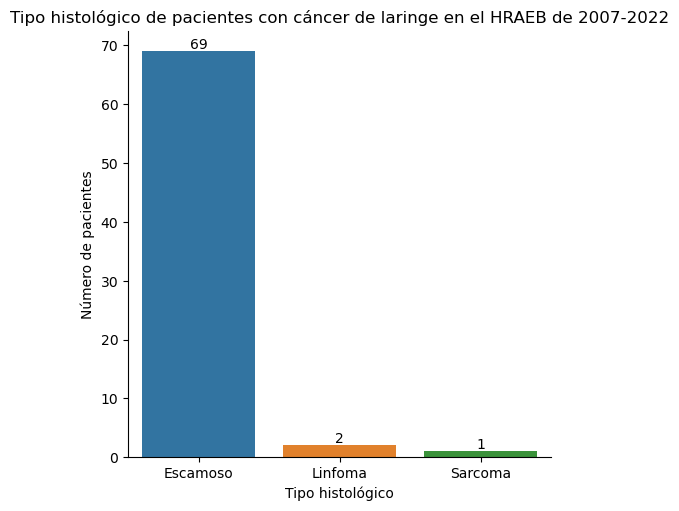

In [343]:
g = sns.catplot(x='Tipo histológico', kind='count', data=df)
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Tipo histológico de pacientes con cáncer de laringe en el HRAEB de 2007-2022')

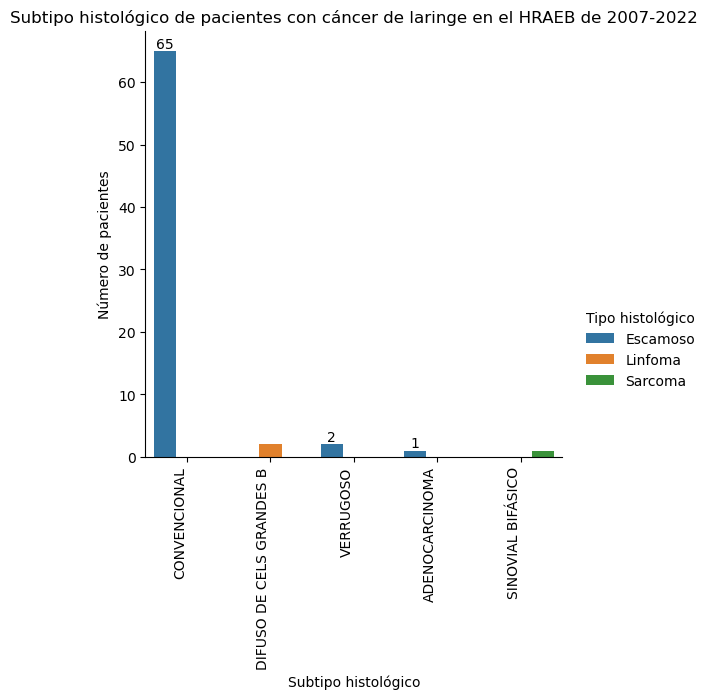

In [344]:
s = sns.catplot(x='Subtipo histológico', kind='count', data=df, hue='Tipo histológico')
for ax in s.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Subtipo histológico de pacientes con cáncer de laringe en el HRAEB de 2007-2022')
    plt.xticks(rotation=90, ha='right')
plt.show()

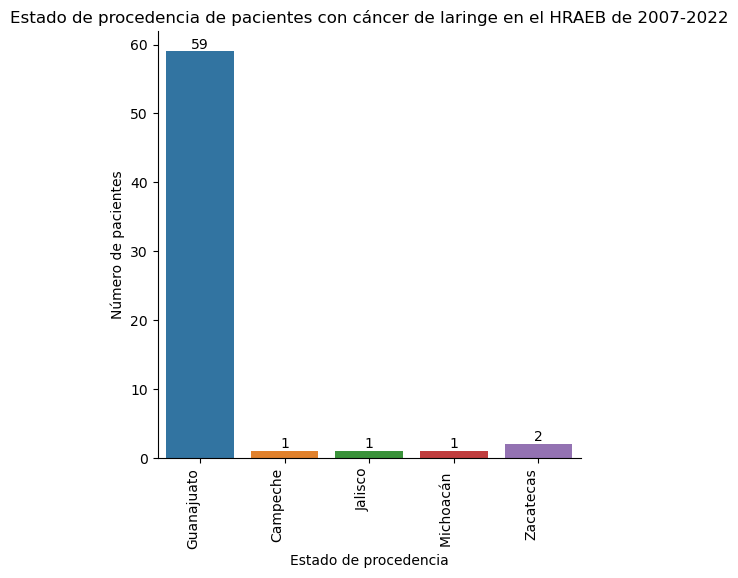

In [345]:
f= sns.catplot(x='Estado de procedencia', kind='count', data=df)
for ax in f.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Estado de procedencia de pacientes con cáncer de laringe en el HRAEB de 2007-2022')
    plt.xticks(rotation=90, ha='right')
plt.show()

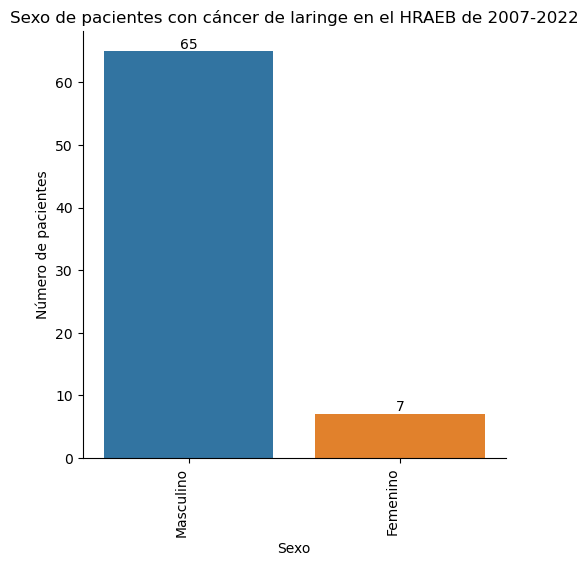

In [346]:
d= sns.catplot(x='Sexo', kind='count', data=df)
for ax in d.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Sexo de pacientes con cáncer de laringe en el HRAEB de 2007-2022')
    plt.xticks(rotation=90, ha='right')
plt.show()

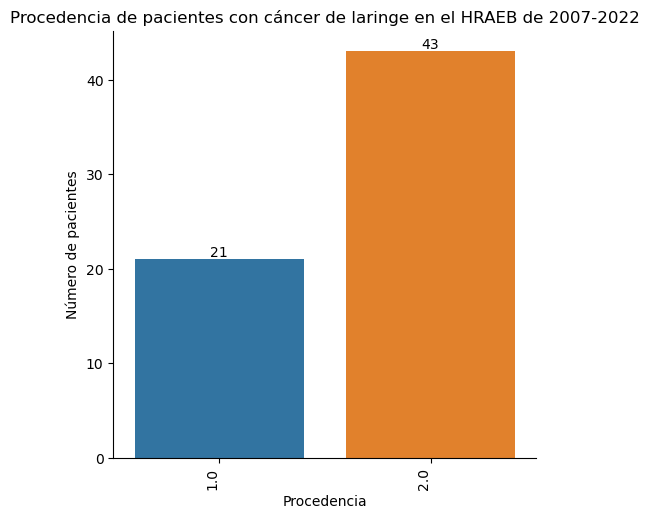

In [347]:
a= sns.catplot(x='Procedencia', kind='count', data=df)
for ax in a.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Procedencia de pacientes con cáncer de laringe en el HRAEB de 2007-2022')
    plt.xticks(rotation=90, ha='right')
plt.show()

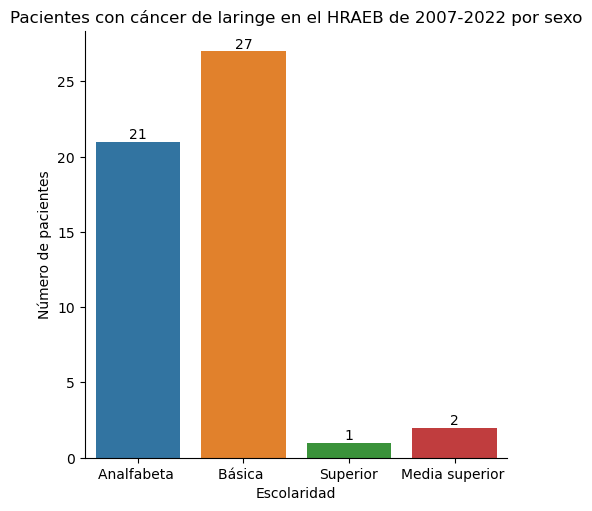

In [348]:
e= sns.catplot(x= 'Escolaridad', kind='count', data=df)
for ax in e.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Pacientes con cáncer de laringe en el HRAEB de 2007-2022 por sexo')
    plt.show(e)

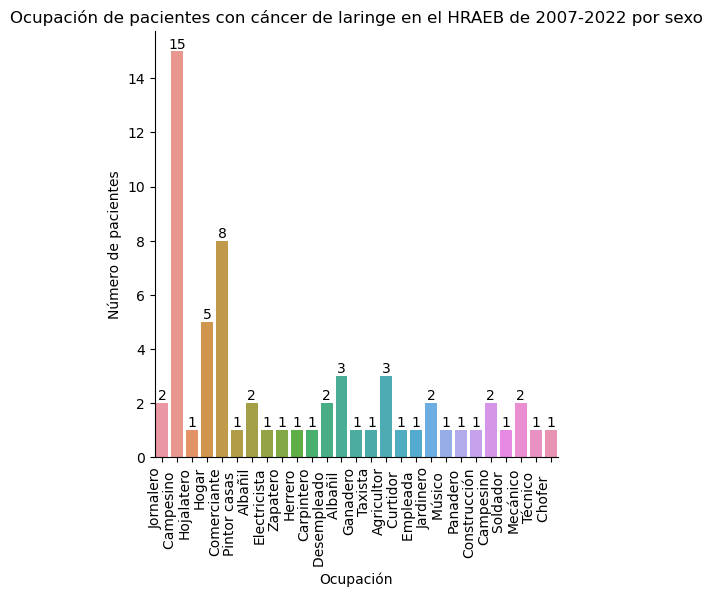

In [349]:
do = sns.catplot(x= 'Ocupación', kind='count', data=df)
for ax in do.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Ocupación de pacientes con cáncer de laringe en el HRAEB de 2007-2022 por sexo')
    plt.xticks(rotation=90, ha='right')
    plt.show(do)

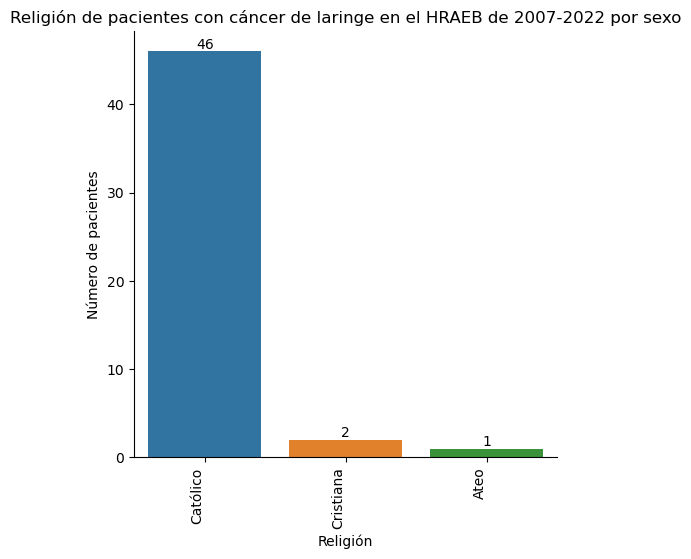

In [350]:
re= sns.catplot(x= 'Religión', kind='count', data=df)
for ax in re.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Religión de pacientes con cáncer de laringe en el HRAEB de 2007-2022 por sexo')
    plt.xticks(rotation=90, ha='right')
    plt.show(re)

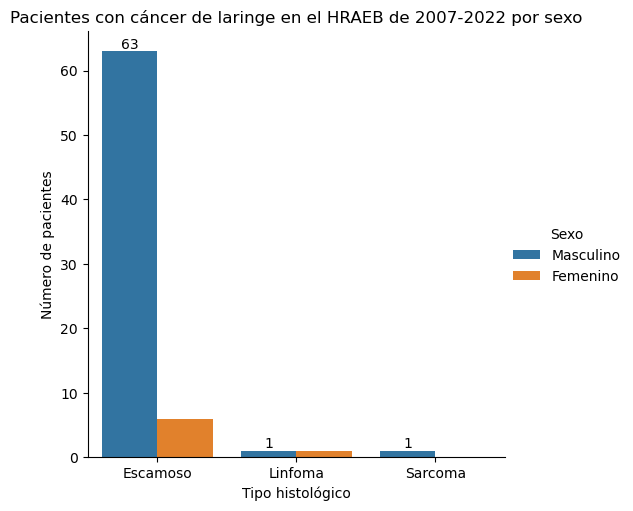

In [351]:
d = sns.catplot(x= 'Tipo histológico', kind='count', data=df, hue='Sexo')
for ax in d.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Pacientes con cáncer de laringe en el HRAEB de 2007-2022 por sexo')
    plt.show(d)

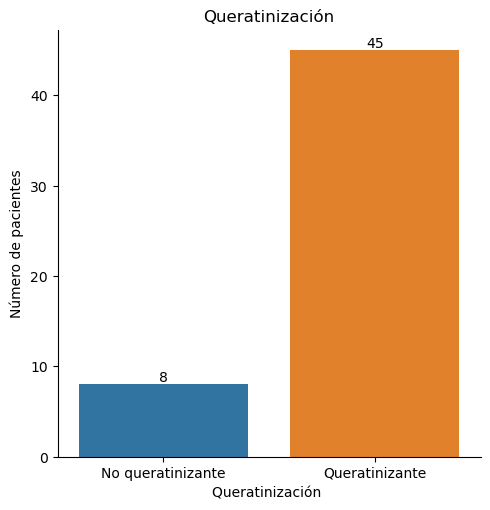

In [352]:
z = sns.catplot(x= 'Queratinización ', kind='count', data=df)
for ax in z.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Queratinización')
    plt.show(z)

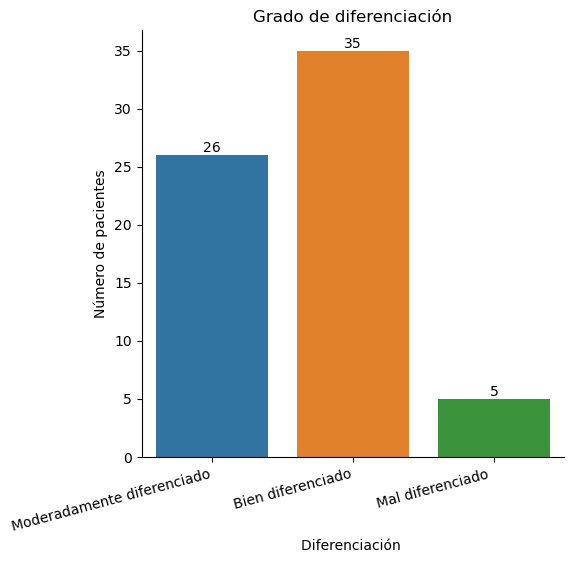

In [353]:
o = sns.catplot(x= 'Diferenciación ', kind='count', data=df)
for ax in o.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Grado de diferenciación')
    plt.xticks(rotation=15, ha='right')
    plt.show(o)

In [354]:
treinta_cincuenta= df['Edad']<=50
cincuenta= df['Edad']>50
setenta= df['Edad']<=70
cincuenta_setenta= df[cincuenta&setenta]
setenta_ymas= df['Edad']>=71
print(treinta_cincuenta.value_counts())

False    64
True     11
Name: Edad, dtype: int64


In [355]:
print(setenta_ymas.value_counts())
print(treinta_cincuenta.value_counts(normalize=True))
print(setenta_ymas.value_counts(normalize=True))


False    55
True     20
Name: Edad, dtype: int64
False    0.853333
True     0.146667
Name: Edad, dtype: float64
False    0.733333
True     0.266667
Name: Edad, dtype: float64


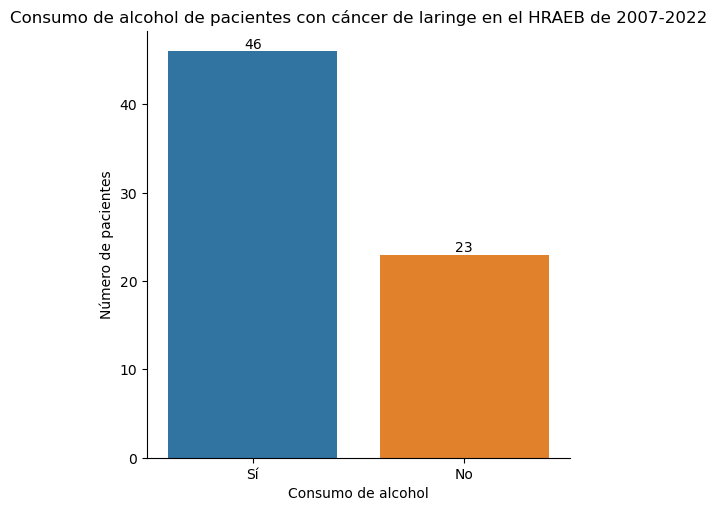

In [356]:
a = sns.catplot(x='Consumo de alcohol', kind='count', data=df)
for ax in a.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Consumo de alcohol de pacientes con cáncer de laringe en el HRAEB de 2007-2022')
    plt.show(a)

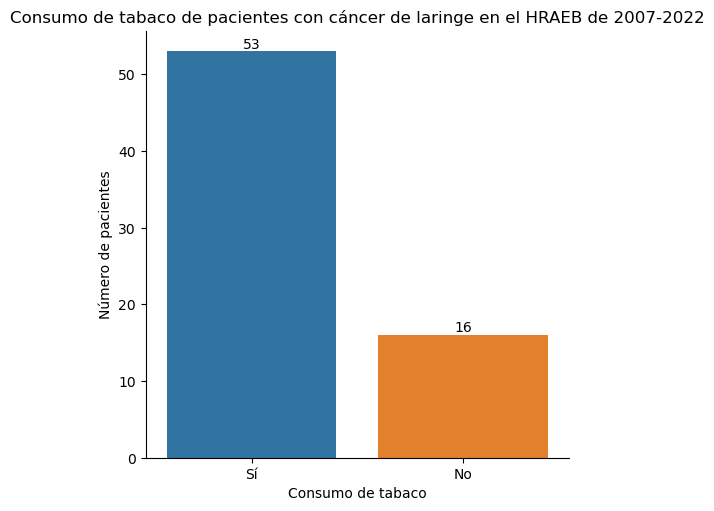

In [357]:
b = sns.catplot(x='Consumo de tabaco', kind='count', data=df)
for ax in b.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Consumo de tabaco de pacientes con cáncer de laringe en el HRAEB de 2007-2022')
    plt.show(b)

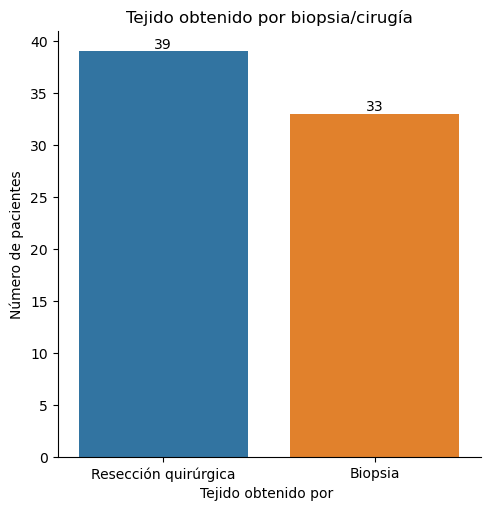

In [358]:
c = sns.catplot(x= 'Tejido obtenido por ', kind='count', data=df)
for ax in c.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Tejido obtenido por biopsia/cirugía')
    plt.show(c)
    

In [359]:
#Correlación de consumo de tabaco y riesgo de desarrollar CCE laringe
from scipy.stats.contingency import relative_risk
result= relative_risk(54, 54, 15, 18)
print(result.relative_risk)
result.confidence_interval(confidence_level=0.95)

1.2


ConfidenceInterval(low=0.9760155236586566, high=1.4753863694729648)

In [360]:
#Correlación de consumo de alcohol y riesgo de desarrollar CCE laringe
from scipy.stats.contingency import relative_risk
result= relative_risk(46, 46, 23, 26)
print(result.relative_risk)
result.confidence_interval(confidence_level=0.95)

1.1304347826086958


ConfidenceInterval(low=0.9839112064175742, high=1.2987785781852685)

In [361]:
supervivencia= df['Supervivencia desde el dx (meses)'].dropna()

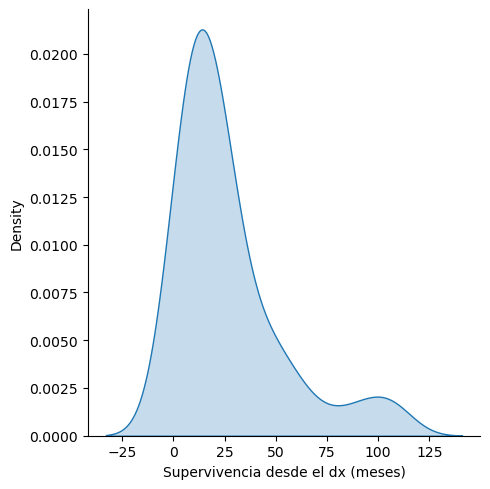

In [362]:
sns.displot(x= supervivencia, kind='kde', data=df, fill=True)
plt.show()

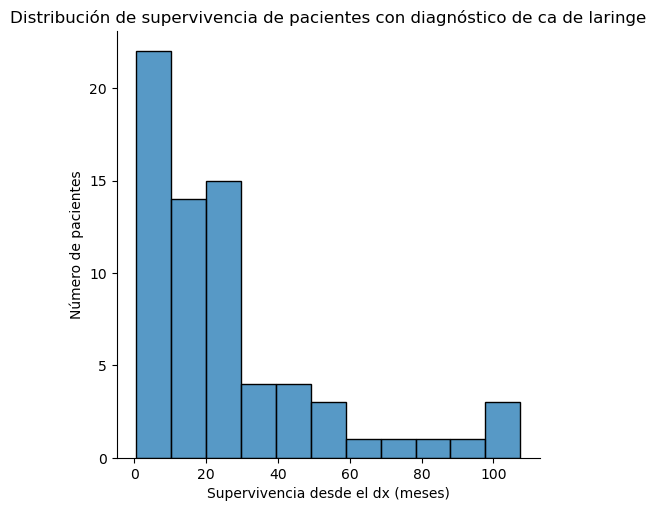

In [363]:
sns.displot(x= supervivencia, kind='hist', data=df)
plt.title('Distribución de supervivencia de pacientes con diagnóstico de ca de laringe')
plt.ylabel('Número de pacientes')
plt.show()

In [364]:
supervivencia_average= df['Supervivencia desde el dx (meses)'].mean()
print ('Tiempo de vigilancia media:',supervivencia_average)

Tiempo de vigilancia media: 26.502415459086954


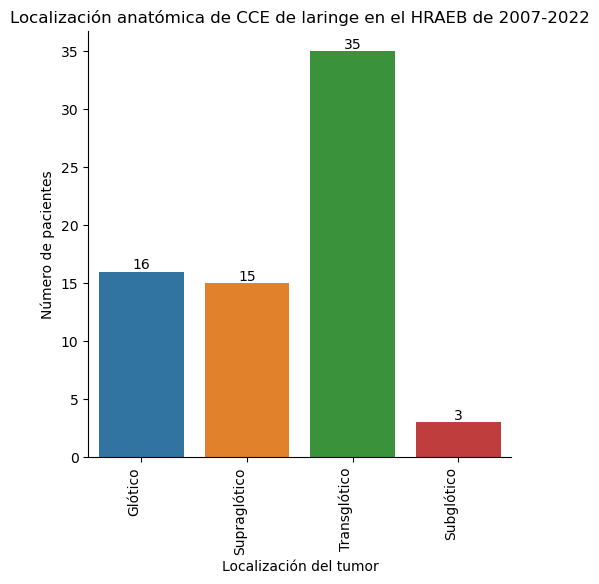

In [365]:
v = sns.catplot(x= 'Localización del tumor', kind='count', data=df)
for ax in v.axes.flat:
    ax.bar_label(ax.containers[0])
    ax.set(ylabel='Número de pacientes', title= 'Localización anatómica de CCE de laringe en el HRAEB de 2007-2022')
    plt.xticks(rotation=90, ha='right')
    plt.show(v)

In [366]:
sup= pd.read_csv('supervivencia ca laringe.csv')

In [492]:
kmf= KaplanMeierFitter()
kmf.fit(durations=df['Supervivencia desde el dx (meses)'].dropna(), event_observed=df['Estado actual'].dropna())

ValueError: cannot reshape array of size 72 into shape (69,)

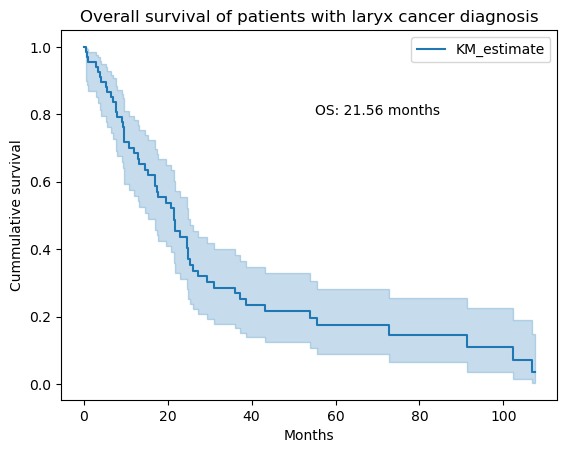

In [373]:
ax=plt.subplot(111)
kmf.plot_survival_function()
plt.title('Overall survival of patients with laryx cancer diagnosis')
plt.xlabel('Months')
plt.ylabel('Cummulative survival')
plt.text(55,0.8, 'OS: 21.56 months')
plt.show()



In [372]:
print(kmf.median_survival_time_)

21.56666667


In [374]:
from lifelines.utils import median_survival_times
print(median_survival_times(kmf.confidence_interval_))

     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    15.2               24.866667


In [375]:
kmf= KaplanMeierFitter()
kmf.fit(durations=sup['Supervivencia desde el dx (meses)'], event_observed=sup['Estado actual'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 68 total observations, 13 right-censored observations>

In [376]:
df2=pd.DataFrame(df[['Consumo de tabaco', 'Supervivencia desde el dx (meses)', 'Estado actual']].dropna())
tabaquismo= df2['Consumo de tabaco']== 'Sí'
no_tab= df2['Consumo de tabaco']=='No'

In [526]:
import statsmodels.api as smf
df68=pd.DataFrame(df[['Tipo histológico','Consumo de tabaco']].dropna())

20.86666667
29.3


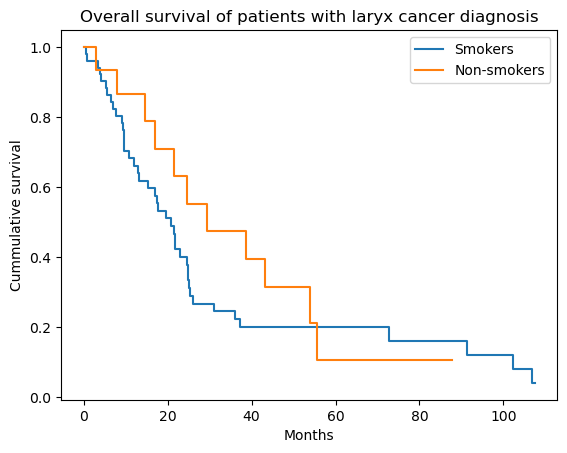

29.3


In [528]:
ax=plt.subplot(111)
fum_kmf=kmf.fit(durations=df2[tabaquismo]['Supervivencia desde el dx (meses)'], event_observed=df2[tabaquismo]['Estado actual'], label='Smokers')
fum_kmf.plot_survival_function(ax=ax, ci_show=False)
print(fum_kmf.median_survival_time_)
nofum_kmf=kmf.fit(durations=df2[~tabaquismo]['Supervivencia desde el dx (meses)'], event_observed=df2[~tabaquismo]['Estado actual'], label='Non-smokers')
nofum_kmf.plot_survival_function(ax=ax, ci_show=False)
print(nofum_kmf.median_survival_time_)
plt.title('Overall survival of patients with laryx cancer diagnosis')
plt.xlabel('Months')
plt.ylabel('Cummulative survival')
plt.show(ax
        )

print(nofum_kmf.median_survival_time_)

In [380]:
fum_kmf=kmf.fit(durations=df2[tabaquismo]['Supervivencia desde el dx (meses)'], event_observed=df2[tabaquismo]['Estado actual'], label='Fumadores')
fum_kmf.predict([12,36,60])

12    0.660281
36    0.221869
60    0.199682
Name: Fumadores, dtype: float64

In [381]:
nofum_kmf=kmf.fit(durations=df2[~tabaquismo]['Supervivencia desde el dx (meses)'], event_observed=df2[~tabaquismo]['Estado actual'], label='No fumadores')
nofum_kmf.predict([12,36,60])

12    0.866667
36    0.472727
60    0.105051
Name: No fumadores, dtype: float64

In [384]:
print(df2)

   Consumo de tabaco  Supervivencia desde el dx (meses)  Estado actual
0                 Sí                           3.766667            1.0
1                 Sí                          25.300000            1.0
2                 Sí                           9.666667            1.0
4                 Sí                           9.266667            1.0
5                 Sí                          25.000000            1.0
..               ...                                ...            ...
67                Sí                          10.900000            0.0
68                No                          12.200000            0.0
69                Sí                           5.866667            0.0
70                Sí                           6.533333            1.0
71                No                           8.633333            0.0

[66 rows x 3 columns]


In [532]:
sup_fumadores= df2[df2['Consumo de tabaco']=='Sí']['Supervivencia desde el dx (meses)']
sup_no_fumadores=df2[df2['Consumo de tabaco']=='No']['Supervivencia desde el dx (meses)']
event_fumadores= df2[df2['Consumo de tabaco']=='Sí']['Estado actual']
event_no_fumadores= df2[df2['Consumo de tabaco']=='No']['Estado actual']

In [533]:
from lifelines.statistics import logrank_test

In [534]:
resultados=logrank_test(sup_fumadores, sup_no_fumadores, event_fumadores, event_no_fumadores, alpha=0.95)
resultados.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.78 0.38      1.41

In [535]:
from lifelines.statistics import survival_difference_at_fixed_point_in_time_test


T_exp, E_exp = sup_fumadores, event_fumadores
T_con, E_con = sup_no_fumadores, event_no_fumadores

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time =6
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 6
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 51 total observations, 9 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 15 total observations, 4 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.31 0.58      0.79

In [536]:

T_exp, E_exp = sup_fumadores, event_fumadores
T_con, E_con = sup_no_fumadores, event_no_fumadores

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 12
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 12
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 51 total observations, 9 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 15 total observations, 4 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           2.02 0.16      2.69

In [537]:

T_exp, E_exp = sup_fumadores, event_fumadores
T_con, E_con = sup_no_fumadores, event_no_fumadores

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 36
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 36
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 51 total observations, 9 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 15 total observations, 4 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           2.12 0.15      2.78

In [538]:

T_exp, E_exp = sup_fumadores, event_fumadores
T_con, E_con = sup_no_fumadores, event_no_fumadores

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 60
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 60
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 51 total observations, 9 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 15 total observations, 4 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.57 0.45      1.15

In [539]:

T_exp, E_exp = sup_fumadores, event_fumadores
T_con, E_con = sup_no_fumadores, event_no_fumadores

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 80
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 80
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 51 total observations, 9 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 15 total observations, 4 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.20 0.66      0.61

In [397]:
df3=pd.DataFrame(df[['Consumo de alcohol', 'Supervivencia desde el dx (meses)',
                     'Estado actual']]).dropna()

In [398]:
print(df3)

   Consumo de alcohol  Supervivencia desde el dx (meses)  Estado actual
0                  Sí                           3.766667            1.0
1                  Sí                          25.300000            1.0
2                  No                           9.666667            1.0
4                  Sí                           9.266667            1.0
5                  Sí                          25.000000            1.0
..                ...                                ...            ...
67                 Sí                          10.900000            0.0
68                 No                          12.200000            0.0
69                 Sí                           5.866667            0.0
70                 Sí                           6.533333            1.0
71                 No                           8.633333            0.0

[66 rows x 3 columns]


In [399]:
alcoholismo= df3['Consumo de alcohol']=='Sí'
noalc=df3['Consumo de alcohol']== 'No'
alc_kmf= kmf.fit(durations=df3[alcoholismo]['Supervivencia desde el dx (meses)'],
                event_observed=df3[alcoholismo]['Estado actual'], label='Alcoholicos')
noalc_kmf= kmf.fit(durations=df3[~alcoholismo]['Supervivencia desde el dx (meses)'], 
                  event_observed=df3[~alcoholismo]['Estado actual'], label='No Alcoholicos')


21.56666667
12    0.650608
36    0.235447
60    0.201812
Name: Drinkers, dtype: float64
24.53333333
12    0.815657
36    0.356850
60    0.135943
Name:  No drinkers, dtype: float64


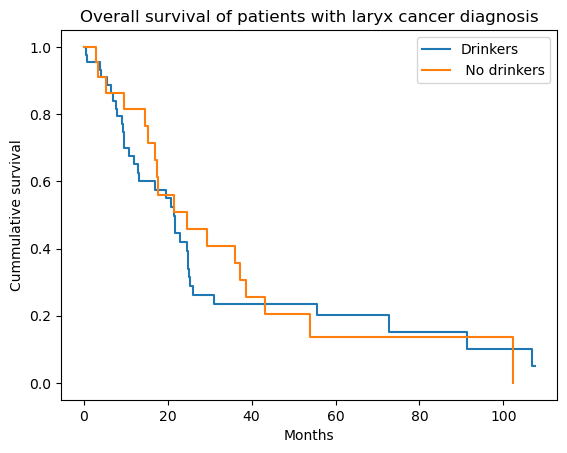

In [400]:
ax=plt.subplot(111)
alc_kmf=kmf.fit(durations=df3[alcoholismo]['Supervivencia desde el dx (meses)'], event_observed=df3[alcoholismo]['Estado actual'], label='Drinkers')
alc_kmf.plot_survival_function(ax=ax, ci_show=False)
print(alc_kmf.median_survival_time_)
print(alc_kmf.predict([12,36,60]))
noalc_kmf=kmf.fit(durations=df3[~alcoholismo]['Supervivencia desde el dx (meses)'], event_observed=df3[~alcoholismo]['Estado actual'], label=' No drinkers')
noalc_kmf.plot_survival_function(ax=ax, ci_show=False)
print(noalc_kmf.median_survival_time_)
print(noalc_kmf.predict([12,36,60]))
plt.title('Overall survival of patients with laryx cancer diagnosis')
plt.xlabel('Months')
plt.ylabel('Cummulative survival')
plt.show()


In [401]:
print(alc_kmf.predict([12,36,60]))



12    0.815657
36    0.356850
60    0.135943
Name:  No drinkers, dtype: float64


In [540]:
sup_alcoholicos= df3[df3['Consumo de alcohol']=='Sí']['Supervivencia desde el dx (meses)']
sup_no_alcoholicos=df3[df3['Consumo de alcohol']=='No']['Supervivencia desde el dx (meses)']
event_alcoholicos= df3[df3['Consumo de alcohol']=='Sí']['Estado actual']
event_no_alcoholicos= df3[df3['Consumo de alcohol']=='No']['Estado actual']
resultados2=logrank_test(sup_alcoholicos, sup_no_alcoholicos, event_alcoholicos, event_no_alcoholicos, alpha=0.95)
resultados2.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.06 0.80      0.32

In [404]:

T_exp, E_exp = sup_alcoholicos, event_alcoholicos
T_con, E_con = sup_no_alcoholicos, event_no_alcoholicos

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 6
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 6
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 44 total observations, 9 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 22 total observations, 0 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.07 0.80      0.33

In [405]:

T_exp, E_exp = sup_alcoholicos, event_alcoholicos
T_con, E_con = sup_no_alcoholicos, event_no_alcoholicos

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 12
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 12
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 44 total observations, 9 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 22 total observations, 0 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.82 0.37      1.45

In [406]:

T_exp, E_exp = sup_alcoholicos, event_alcoholicos
T_con, E_con = sup_no_alcoholicos, event_no_alcoholicos

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 36
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 36
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 44 total observations, 9 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 22 total observations, 0 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.48 0.49      1.03

In [407]:

T_exp, E_exp = sup_alcoholicos, event_alcoholicos
T_con, E_con = sup_no_alcoholicos, event_no_alcoholicos

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 60
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 60
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 44 total observations, 9 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 22 total observations, 0 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           1.20 0.27      1.87

In [545]:

df4=pd.DataFrame(df[['Edad', 'Supervivencia desde el dx (meses)', 'Estado actual']].dropna())

In [546]:
print(df4)

    Edad  Supervivencia desde el dx (meses)  Estado actual
0   72.0                           3.766667            1.0
1   70.0                          25.300000            1.0
2   60.0                           9.666667            1.0
4   60.0                           9.266667            1.0
5   53.0                          25.000000            1.0
..   ...                                ...            ...
67  36.0                          10.900000            0.0
68  59.0                          12.200000            0.0
69  59.0                           5.866667            0.0
70  67.0                           6.533333            1.0
71  72.0                           8.633333            0.0

[69 rows x 3 columns]


24.73333333
17.6


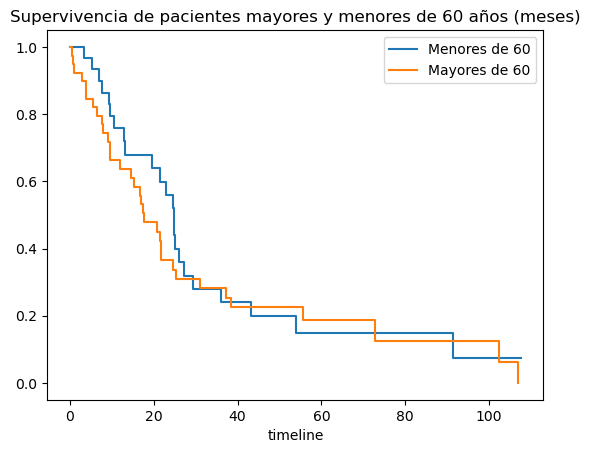

In [547]:
menos_60= df4['Edad']<=60
mas_60= df4['Edad']>60

ax=plt.subplot(111)

menores_kmf=kmf.fit(durations=df4[menos_60]['Supervivencia desde el dx (meses)'], event_observed=df4[menos_60]['Estado actual'], label='Menores de 60')

menores_kmf.plot_survival_function(ax=ax, ci_show=False)

print(menores_kmf.median_survival_time_)
mayores_kmf=kmf.fit(durations=df4[~menos_60]['Supervivencia desde el dx (meses)'], event_observed=df4[~menos_60]['Estado actual'], label='Mayores de 60')
print(mayores_kmf.median_survival_time_)
mayores_kmf.plot_survival_function(ax=ax, ci_show=False)
plt.title('Supervivencia de pacientes mayores y menores de 60 años (meses)')

plt.show()

In [548]:
menores_kmf=kmf.fit(durations=df4[menos_60]['Supervivencia desde el dx (meses)'], event_observed=df4[menos_60]['Estado actual'], label='Menores de 60')
print(menores_kmf.predict([12, 36, 60]))

12    0.758923
36    0.239660
60    0.149787
Name: Menores de 60, dtype: float64


In [549]:

mayores_kmf=kmf.fit(durations=df4[~menos_60]['Supervivencia desde el dx (meses)'], event_observed=df4[~menos_60]['Estado actual'], label='Mayores de 60')
print(mayores_kmf.predict([12, 36, 60]))

12    0.637363
36    0.281189
60    0.187460
Name: Mayores de 60, dtype: float64


In [550]:
print(mayores_kmf.median_survival_time_)
print(menores_kmf.median_survival_time_)

17.6
17.6


In [551]:
sup_menores= df4[df4['Edad']<=60]['Supervivencia desde el dx (meses)']
sup_mayores=df4[df4['Edad']>60]['Supervivencia desde el dx (meses)']
event_menores= df4[df4['Edad']<=60]['Estado actual']
event_mayores= df4[df4['Edad']>60]['Estado actual']
resultados2=logrank_test(sup_menores, sup_mayores, event_menores, event_mayores, alpha=0.95)
resultados2.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.53 0.47      1.10

In [552]:

T_exp, E_exp = sup_mayores, event_mayores
T_con, E_con = sup_menores, event_menores

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 6
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 6
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 39 total observations, 6 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 30 total observations, 7 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           1.59 0.21      2.27

In [553]:

T_exp, E_exp = sup_mayores, event_mayores
T_con, E_con = sup_menores, event_menores

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 12
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 12
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 39 total observations, 6 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 30 total observations, 7 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           1.11 0.29      1.77

In [554]:

T_exp, E_exp = sup_mayores, event_mayores
T_con, E_con = sup_menores, event_menores

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 36
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 36
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 39 total observations, 6 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 30 total observations, 7 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.13 0.72      0.47

In [555]:

T_exp, E_exp = sup_mayores, event_mayores
T_con, E_con = sup_menores, event_menores

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 60
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 60
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 39 total observations, 6 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 30 total observations, 7 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.14 0.71      0.50

In [556]:
df5=pd.DataFrame(df[['Localización del tumor', 'Supervivencia desde el dx (meses)', 'Estado actual']].dropna())
print(df5)

   Localización del tumor  Supervivencia desde el dx (meses)  Estado actual
0                 Glótico                           3.766667            1.0
1            Supraglótico                          25.300000            1.0
2            Transglótico                           9.666667            1.0
4                 Glótico                           9.266667            1.0
5            Transglótico                          25.000000            1.0
..                    ...                                ...            ...
67                Glótico                          10.900000            0.0
68           Supraglótico                          12.200000            0.0
69                Glótico                           5.866667            0.0
70           Supraglótico                           6.533333            1.0
71                Glótico                           8.633333            0.0

[66 rows x 3 columns]


14.63333333
20.86666667
24.73333333
55.5


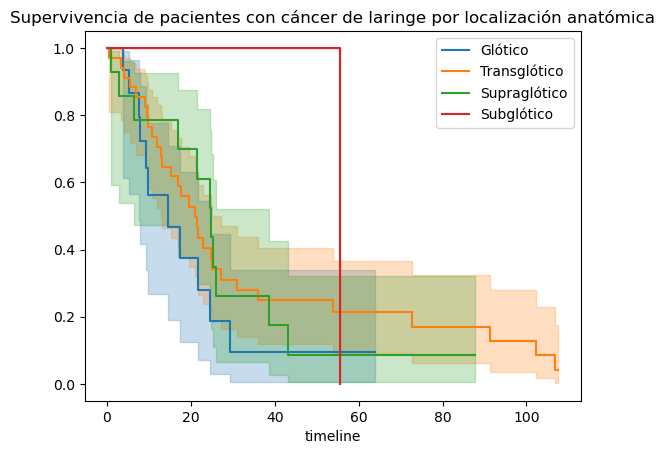

In [557]:
glotico= df5['Localización del tumor']== 'Glótico'
transglotico= df5['Localización del tumor']== 'Transglótico'
supraglotico= df5['Localización del tumor']== 'Supraglótico'
subglotico= df5['Localización del tumor']== 'Subglótico'
ax=plt.subplot(111)

glotico_kmf=kmf.fit(durations=df5[glotico]['Supervivencia desde el dx (meses)'], event_observed=df5[glotico]['Estado actual'], label='Glótico')
glotico_kmf.plot_survival_function(ax=ax)
print(glotico_kmf.median_survival_time_)
transglotico_kmf=kmf.fit(durations=df5[transglotico]['Supervivencia desde el dx (meses)'], event_observed=df5[transglotico]['Estado actual'], label='Transglótico')
transglotico_kmf.plot_survival_function(ax=ax)
print(transglotico_kmf.median_survival_time_)
supraglotico_kmf=kmf.fit(durations=df5[supraglotico]['Supervivencia desde el dx (meses)'], event_observed=df5[supraglotico]['Estado actual'], label='Supraglótico')
supraglotico_kmf.plot_survival_function(ax=ax)
print(supraglotico_kmf.median_survival_time_)
subglotico_kmf=kmf.fit(durations=df5[subglotico]['Supervivencia desde el dx (meses)'], event_observed=df5[subglotico]['Estado actual'], label='Subglótico')
subglotico_kmf.plot_survival_function(ax=ax)
print(subglotico_kmf.median_survival_time_)
plt.title('Supervivencia de pacientes con cáncer de laringe por localización anatómica')
plt.show()

In [558]:
glotico_kmf=kmf.fit(durations=df5[glotico]['Supervivencia desde el dx (meses)'], event_observed=df5[glotico]['Estado actual'], label='Glótico')

print(glotico_kmf.predict([12, 36, 60]))


12    0.561728
36    0.093621
60    0.093621
Name: Glótico, dtype: float64


In [422]:
transglotico_kmf=kmf.fit(durations=df5[transglotico]['Supervivencia desde el dx (meses)'], event_observed=df5[transglotico]['Estado actual'], label='Transglótico')
print(transglotico_kmf.predict([12, 36, 60]))

12    0.705882
36    0.248366
60    0.212885
Name: Transglótico, dtype: float64


In [423]:
supraglotico_kmf=kmf.fit(durations=df5[supraglotico]['Supervivencia desde el dx (meses)'], event_observed=df5[supraglotico]['Estado actual'], label='Supraglótico')
print(supraglotico_kmf.predict([12, 36, 60]))

12    0.785714
36    0.261905
60    0.087302
Name: Supraglótico, dtype: float64


In [424]:
subglotico_kmf=kmf.fit(durations=df5[subglotico]['Supervivencia desde el dx (meses)'], event_observed=df5[subglotico]['Estado actual'], label='Subglótico')
print(subglotico_kmf.predict([12, 36, 60]))

12    1.0
36    1.0
60    0.0
Name: Subglótico, dtype: float64


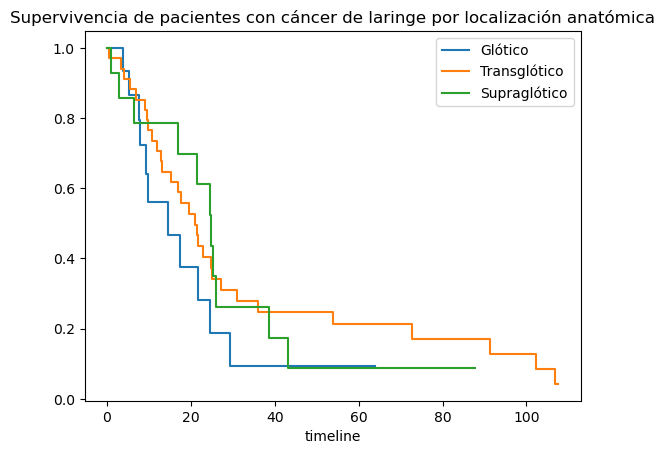

In [425]:

ax=plt.subplot(111)

glotico_kmf=kmf.fit(durations=df5[glotico]['Supervivencia desde el dx (meses)'], event_observed=df5[glotico]['Estado actual'], label='Glótico')
glotico_kmf.plot_survival_function(ax=ax, ci_show=False)
transglotico_kmf=kmf.fit(durations=df5[transglotico]['Supervivencia desde el dx (meses)'], event_observed=df5[transglotico]['Estado actual'], label='Transglótico')
transglotico_kmf.plot_survival_function(ax=ax, ci_show=False)
supraglotico_kmf=kmf.fit(durations=df5[supraglotico]['Supervivencia desde el dx (meses)'], event_observed=df5[supraglotico]['Estado actual'], label='Supraglótico')
supraglotico_kmf.plot_survival_function(ax=ax, ci_show=False)
plt.title('Supervivencia de pacientes con cáncer de laringe por localización anatómica')

plt.show()

In [493]:
from lifelines.statistics import multivariate_logrank_test

In [559]:
sup_glotico= df5[df5['Localización del tumor']=='Glótico']['Supervivencia desde el dx (meses)']
sup_transglotico= df5[df5['Localización del tumor']=='Transglótico']['Supervivencia desde el dx (meses)']
sup_supraglotico= df5[df5['Localización del tumor']=='Supraglótico']['Supervivencia desde el dx (meses)']
sup_subglotico= df5[df5['Localización del tumor']=='Subglótico']['Supervivencia desde el dx (meses)']
event_glotico= df5[df5['Localización del tumor']=='Glótico']['Estado actual']
event_transglotico= df5[df5['Localización del tumor']=='Transglótico']['Estado actual']
event_supraglotico= df5[df5['Localización del tumor']=='Supraglótico']['Estado actual']
resultados5=logrank_test(sup_glotico, sup_transglotico, event_glotico, event_transglotico, alpha=0.95)
resultados5.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.63 0.20      2.31

In [560]:
resultados51=logrank_test(sup_glotico, sup_transglotico, event_glotico, event_transglotico, alpha=0.95)
resultados51.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.63 0.20      2.31

In [561]:

T_exp, E_exp = sup_glotico, event_glotico
T_con, E_con = sup_supraglotico, event_supraglotico

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 60
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 60
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 15 total observations, 4 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 14 total observations, 3 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.00 0.96      0.06

In [562]:
np_sup= np.array(df5['Supervivencia desde el dx (meses)'])
np_loc=np.array(df5['Localización del tumor'])
np_event=np.array(df5['Estado actual'])
multivariate_logrank_test(np_sup, np_loc, np_event, alpha=0.95)

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           5.08 0.17      2.59

In [515]:
print(multivariate_logrank_test(np_sup, np_loc, np_event, alpha=0.95, t_0=12))


<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = 12
 null_distribution = chi squared
degrees_of_freedom = 3
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           2.53 0.47      1.09


In [518]:
print(multivariate_logrank_test(np_sup, np_loc, np_event, alpha=0.95, t_0=36))

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = 36
 null_distribution = chi squared
degrees_of_freedom = 3
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           6.95 0.07      3.76


In [521]:
multivariate_logrank_test(np_sup, np_loc, np_event, alpha=0.95, t_0=60)

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = 60
 null_distribution = chi squared
degrees_of_freedom = 3
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           5.10 0.16      2.60

In [430]:
from lifelines.statistics import pairwise_logrank_test

In [524]:
pairwise_logrank_test(np_sup, np_loc, np_event,   alpha=0.95, t_0=36, bonferroni=True)

<lifelines.StatisticalResult: logrank_test>
               t_0 = 36
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
        bonferroni = True
         test_name = logrank_test

---
                           test_statistic    p  -log2(p)
Glótico      Subglótico              5.65 0.02      5.84
             Supraglótico            1.73 0.19      2.41
             Transglótico            1.80 0.18      2.47
Subglótico   Supraglótico            3.63 0.06      4.14
             Transglótico            4.03 0.04      4.48
Supraglótico Transglótico            0.11 0.74      0.43

In [432]:
diabetes= df['Diabetes '].value_counts()
ERC= df['ERC'].value_counts()
obesidad= df['Obesidad '].value_counts()
HAS= df['HAS'].value_counts()
ERGE= df['ERGE'].value_counts()
disfagia= df['Disfagia'].value_counts()
disfonia= df['Disfonía'].value_counts()
fiebre=df['Fiebre'].value_counts()
tos= df['Tos'].value_counts()
cpoextraño=df['Sensación de cuerpo extraño'].value_counts()
perdida_peso= df['Pérdida de peso'].value_counts()
disnea= df['Dificultad respiratoria'].value_counts()

In [433]:
print('Diabetes:',diabetes, 
      'ERC:',ERC,
     'obesidad:', obesidad, 
      'HAS:', HAS, 
      'ERGE:', ERGE, 
      'disfagia:', disfagia,
      'disfonia:', disfonia, 
      'fiebre:', fiebre, 
      'tos:', tos,
      'sensación de cuerpo extraño', cpoextraño, 
      'pérdida de peso:', perdida_peso, 
      'disnea:', disnea)

Diabetes: No    63
Sí     9
Name: Diabetes , dtype: int64 ERC: No    71
Sí     1
Name: ERC, dtype: int64 obesidad: No    67
Sí     5
Name: Obesidad , dtype: int64 HAS: No    56
Sí    16
Name: HAS, dtype: int64 ERGE: No    69
Sí     3
Name: ERGE, dtype: int64 disfagia: Sí    27
Name: Disfagia, dtype: int64 disfonia: Sí    63
Name: Disfonía, dtype: int64 fiebre: Sí    1
Name: Fiebre, dtype: int64 tos: Sí    9
SI    1
Name: Tos, dtype: int64 sensación de cuerpo extraño Sí    3
Name: Sensación de cuerpo extraño, dtype: int64 pérdida de peso: Sí    19
Name: Pérdida de peso, dtype: int64 disnea: Sí    25
Name: Dificultad respiratoria, dtype: int64


In [563]:
metastasis_g= df['Metástasis a ganglios'].value_counts()
t= df['T'].value_counts()
n= df['N'].value_counts()
m= df['M'].value_counts()
estadio = df['Estadio clínico'].value_counts()
QT= df['Quimioterapia'].value_counts()
RT= df['Radioterapia'].value_counts()

In [564]:
print('metastasis a ganglios', metastasis_g,
     'T:', t,
     'N:', n,
     'M:', m,
     'Estadio clínico:', estadio,
     'QT:', QT,
     'RT:', RT)

metastasis a ganglios Sí    15
No    11
Name: Metástasis a ganglios, dtype: int64 T: T4    36
T3    20
T1     7
T2     6
Name: T, dtype: int64 N: N0     32
N2     20
N1     10
N3      5
N0      1
Name: N, dtype: int64 M: M0    59
M1     9
Mx     1
Name: M, dtype: int64 Estadio clínico: IV     44
III    16
I       7
II      4
Name: Estadio clínico, dtype: int64 QT: Sí    36
No    34
Name: Quimioterapia, dtype: int64 RT: Sí    42
No    28
Name: Radioterapia, dtype: int64


In [565]:
print(df['Invasión perineural'].value_counts())
print(df['Invasión linfovascular'].value_counts())
print(df['Invasión a cartílago'].value_counts())
print(df['Extensión extracapsular'].value_counts())
print(df['Margen quirúrgico positivo'].value_counts())

Sí    23
No    17
Name: Invasión perineural, dtype: int64
Sí    36
No     9
Name: Invasión linfovascular, dtype: int64
Sí    21
No    17
Name: Invasión a cartílago, dtype: int64
No    30
Sí     5
Name: Extensión extracapsular, dtype: int64
Sí    5
Name: Margen quirúrgico positivo, dtype: int64


In [566]:
df6=pd.DataFrame(df[['Extensión extracapsular', 'Supervivencia desde el dx (meses)', 'Estado actual']].dropna())
print(df6)

   Extensión extracapsular  Supervivencia desde el dx (meses)  Estado actual
1                       No                          25.300000            1.0
2                       Sí                           9.666667            1.0
5                       No                          25.000000            1.0
10                      Sí                           1.033333            1.0
12                      No                           9.666667            1.0
14                      No                          87.700000            0.0
16                      No                          36.000000            1.0
19                      No                          48.700000            0.0
22                      No                          12.866667            1.0
23                      No                          91.433333            1.0
26                      No                           9.633333            1.0
27                      No                          10.633333            1.0

21.56666667
25.0


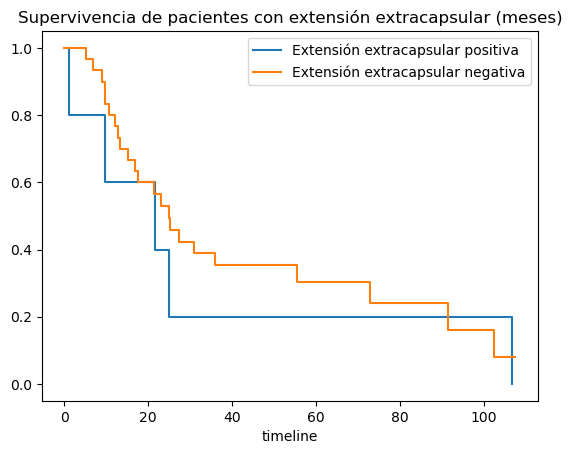

In [567]:
extension_pos= df6['Extensión extracapsular']=='Sí'
extension_neg= df6['Extensión extracapsular']=='No'

ax=plt.subplot(111)

extpos_kmf=kmf.fit(durations=df6[extension_pos]['Supervivencia desde el dx (meses)'], event_observed=df6[extension_pos]['Estado actual'], label='Extensión extracapsular positiva')

extpos_kmf.plot_survival_function(ax=ax, ci_show=False)
print(extpos_kmf.median_survival_time_)
extneg_kmf=kmf.fit(durations=df6[~extension_pos]['Supervivencia desde el dx (meses)'], event_observed=df6[~extension_pos]['Estado actual'], label='Extensión extracapsular negativa')
print(extneg_kmf.median_survival_time_)
extneg_kmf.plot_survival_function(ax=ax, ci_show=False)
plt.title('Supervivencia de pacientes con extensión extracapsular (meses)')

plt.show()

In [568]:
extpos_kmf=kmf.fit(durations=df6[extension_pos]['Supervivencia desde el dx (meses)'], event_observed=df6[extension_pos]['Estado actual'], label='Extensión extracapsular positiva')
print(extpos_kmf.predict([12, 36, 60]))

12    0.6
36    0.2
60    0.2
Name: Extensión extracapsular positiva, dtype: float64


In [569]:
extneg_kmf=kmf.fit(durations=df6[~extension_pos]['Supervivencia desde el dx (meses)'], event_observed=df6[~extension_pos]['Estado actual'], label='Extensión extracapsular negativa')
print(extneg_kmf.predict([12, 36, 60]))

12    0.766667
36    0.352941
60    0.302521
Name: Extensión extracapsular negativa, dtype: float64


In [570]:
sup_extpos= df6[df6['Extensión extracapsular']=='Sí']['Supervivencia desde el dx (meses)']
sup_extneg=df6[df6['Extensión extracapsular']=='No']['Supervivencia desde el dx (meses)']
event_extpos= df6[df6['Extensión extracapsular']=='Sí']['Estado actual']
event_extneg= df6[df6['Extensión extracapsular']=='No']['Estado actual']
resultados4=logrank_test(sup_extpos, sup_extneg, event_extpos, event_extneg, alpha=0.95)
resultados4.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.30 0.59      0.77

In [571]:

T_exp, E_exp = sup_extpos, event_extpos
T_con, E_con = sup_extneg, event_extneg

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 12
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 12
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 5 total observations, 0 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 30 total observations, 7 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.55 0.46      1.12

In [573]:
T_exp, E_exp = sup_extpos, event_extpos
T_con, E_con = sup_extneg, event_extneg

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 36
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 36
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 5 total observations, 0 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 30 total observations, 7 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.52 0.47      1.08

In [444]:
T_exp, E_exp = sup_extpos, event_extpos
T_con, E_con = sup_extneg, event_extneg

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 60
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 60
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 5 total observations, 0 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 30 total observations, 7 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.24 0.63      0.68

In [574]:
df9=pd.DataFrame(df[['Estadio clínico', 'Supervivencia desde el dx (meses)', 'Estado actual']].dropna())
print(df9)

   Estadio clínico  Supervivencia desde el dx (meses)  Estado actual
0               II                           3.766667            1.0
1                I                          25.300000            1.0
2              III                           9.666667            1.0
4               IV                           9.266667            1.0
5              III                          25.000000            1.0
..             ...                                ...            ...
67               I                          10.900000            0.0
68              IV                          12.200000            0.0
69              IV                           5.866667            0.0
70             III                           6.533333            1.0
71              IV                           8.633333            0.0

[68 rows x 3 columns]


25.3
3.766666667
21.73333333
21.56666667


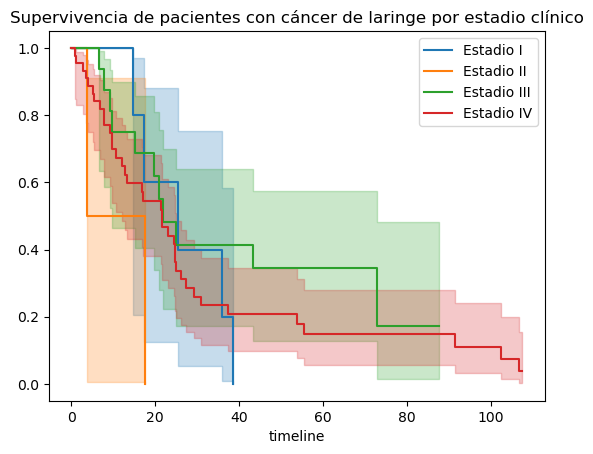

In [575]:
estadio1= df9['Estadio clínico']=='I'
estadio2= df9['Estadio clínico']=='II'
estadio3= df9['Estadio clínico']=='III'
estadio4= df9['Estadio clínico']== 'IV'
ax=plt.subplot(111)

estadio1_kmf=kmf.fit(durations=df9[estadio1]['Supervivencia desde el dx (meses)'], event_observed=df9[estadio1]['Estado actual'], label='Estadio I')
estadio1_kmf.plot_survival_function(ax=ax)
print(estadio1_kmf.median_survival_time_)
estadio2_kmf=kmf.fit(durations=df9[estadio2]['Supervivencia desde el dx (meses)'], event_observed=df9[estadio2]['Estado actual'], label='Estadio II')
estadio2_kmf.plot_survival_function(ax=ax)
print(estadio2_kmf.median_survival_time_)
estadio3_kmf=kmf.fit(durations=df9[estadio3]['Supervivencia desde el dx (meses)'], event_observed=df9[estadio3]['Estado actual'], label='Estadio III')
estadio3_kmf.plot_survival_function(ax=ax)
print(estadio3_kmf.median_survival_time_)
estadio4_kmf=kmf.fit(durations=df9[estadio4]['Supervivencia desde el dx (meses)'], event_observed=df9[estadio4]['Estado actual'], label='Estadio IV')
estadio4_kmf.plot_survival_function(ax=ax)
print(estadio4_kmf.median_survival_time_)
plt.title('Supervivencia de pacientes con cáncer de laringe por estadio clínico')
plt.show()

12    1.0
36    0.2
60    0.0
Name: Estadio I, dtype: float64
12    0.5
36    0.0
60    0.0
Name: Estadio II, dtype: float64
12    0.75000
36    0.41250
60    0.34375
Name: Estadio III, dtype: float64
12    0.648670
36    0.233521
60    0.148267
Name: Estadio IV, dtype: float64


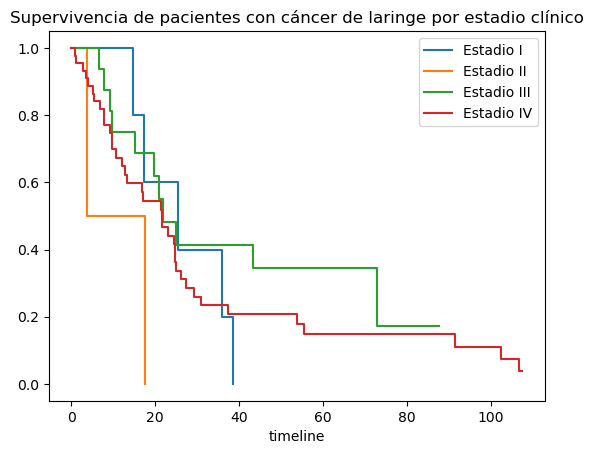

In [576]:
ax=plt.subplot(111)
estadio1_kmf=kmf.fit(durations=df9[estadio1]['Supervivencia desde el dx (meses)'], event_observed=df9[estadio1]['Estado actual'], label='Estadio I')
estadio1_kmf.plot_survival_function(ax=ax, ci_show=False)
print(estadio1_kmf.predict([12, 36, 60]))
estadio2_kmf=kmf.fit(durations=df9[estadio2]['Supervivencia desde el dx (meses)'], event_observed=df9[estadio2]['Estado actual'], label='Estadio II')
estadio2_kmf.plot_survival_function(ax=ax, ci_show=False)
print(estadio2_kmf.predict([12, 36, 60]))
estadio3_kmf=kmf.fit(durations=df9[estadio3]['Supervivencia desde el dx (meses)'], event_observed=df9[estadio3]['Estado actual'], label='Estadio III')
estadio3_kmf.plot_survival_function(ax=ax, ci_show=False)
print(estadio3_kmf.predict([12, 36, 60]))
estadio4_kmf=kmf.fit(durations=df9[estadio4]['Supervivencia desde el dx (meses)'], event_observed=df9[estadio4]['Estado actual'], label='Estadio IV')
estadio4_kmf.plot_survival_function(ax=ax, ci_show=False)
print(estadio4_kmf.predict([12, 36, 60]))
plt.title('Supervivencia de pacientes con cáncer de laringe por estadio clínico')
plt.show()


In [450]:
print(estadio1_kmf.predict([12, 36, 60]))

12    0.648670
36    0.233521
60    0.148267
Name: Estadio IV, dtype: float64


In [451]:
df9.groupby('Estadio clínico').agg(np.mean)


,Supervivencia desde el dx (meses),Estado actual
Estadio clínico,,
I,23.788889,0.833333
II,10.683333,1.000000
III,32.377083,0.687500
IV,26.046970,0.840909


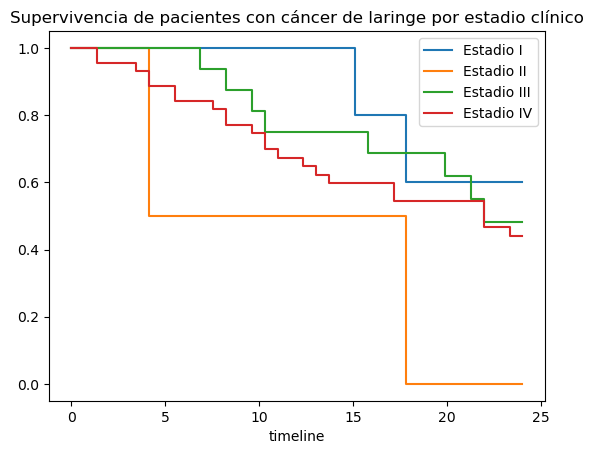

In [452]:
ax=plt.subplot(111)
t=np.linspace(0,24,36)
estadio1_kmf=kmf.fit(durations=df9[estadio1]['Supervivencia desde el dx (meses)'],timeline=t, event_observed=df9[estadio1]['Estado actual'], label='Estadio I')
estadio1_kmf.plot_survival_function(ax=ax, ci_show=False)
estadio2_kmf=kmf.fit(durations=df9[estadio2]['Supervivencia desde el dx (meses)'],timeline=t, event_observed=df9[estadio2]['Estado actual'], label='Estadio II')
estadio2_kmf.plot_survival_function(ax=ax, ci_show=False)
estadio3_kmf=kmf.fit(durations=df9[estadio3]['Supervivencia desde el dx (meses)'], timeline=t,event_observed=df9[estadio3]['Estado actual'], label='Estadio III')
estadio3_kmf.plot_survival_function(ax=ax, ci_show=False)
estadio4_kmf=kmf.fit(durations=df9[estadio4]['Supervivencia desde el dx (meses)'], timeline=t,event_observed=df9[estadio4]['Estado actual'], label='Estadio IV')
estadio4_kmf.plot_survival_function(ax=ax, ci_show=False)
plt.title('Supervivencia de pacientes con cáncer de laringe por estadio clínico')
plt.show()

In [586]:
estadio_sup= np.array(df9['Supervivencia desde el dx (meses)'])
estadio_loc=np.array(df9['Estadio clínico'])
estadio_event=np.array(df9['Estado actual'])
multivariate_logrank_test(estadio_sup, estadio_loc, estadio_event, alpha=0.95)

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           4.18 0.24      2.04

In [579]:
multivariate_logrank_test(estadio_sup, estadio_loc, estadio_event, alpha=0.95, t_0=12)

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = 12
 null_distribution = chi squared
degrees_of_freedom = 3
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           3.68 0.30      1.75

In [582]:
multivariate_logrank_test(estadio_sup, estadio_loc, estadio_event, alpha=0.95,t_0=36)

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = 36
 null_distribution = chi squared
degrees_of_freedom = 3
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           4.54 0.21      2.26

In [584]:
multivariate_logrank_test(estadio_sup, estadio_loc, estadio_event, alpha=0.95,t_0=60)

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = 60
 null_distribution = chi squared
degrees_of_freedom = 3
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           4.71 0.19      2.36

In [588]:
pairwise_logrank_test(estadio_sup, estadio_loc, estadio_event,   alpha=0.95, t_0=12)

<lifelines.StatisticalResult: logrank_test>
               t_0 = 12
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
         test_statistic    p  -log2(p)
I   II             3.00 0.08      3.59
    III            1.66 0.20      2.34
    IV             2.52 0.11      3.15
II  III            1.16 0.28      1.83
    IV             0.38 0.54      0.90
III IV             0.62 0.43      1.22

In [643]:
df10=pd.DataFrame(df[['T', 'Supervivencia desde el dx (meses)', 'Estado actual']].dropna())
print(df10)

     T  Supervivencia desde el dx (meses)  Estado actual
0   T2                           3.766667            1.0
1   T1                          25.300000            1.0
2   T3                           9.666667            1.0
4   T1                           9.266667            1.0
5   T2                          25.000000            1.0
..  ..                                ...            ...
67  T1                          10.900000            0.0
68  T4                          12.200000            0.0
69  T3                           5.866667            0.0
70  T3                           6.533333            1.0
71  T1                           8.633333            0.0

[67 rows x 3 columns]


In [456]:
df10.groupby('T').agg(np.mean)

,Supervivencia desde el dx (meses),Estado actual
T,,
T1,17.442857,0.714286
T2,18.116667,1.000000
T3,27.461667,0.700000
T4,29.051852,0.861111


17.36666667
12    0.833333
36    0.000000
60    0.000000
Name: T1, dtype: float64
17.6
12    0.75
36    0.00
60    0.00
Name: T2, dtype: float64
20.86666667
12    0.633333
36    0.348333
60    0.290278
Name: T3, dtype: float64
12    0.693333
36    0.271304
60    0.172257
Name: T4, dtype: float64
21.66666667


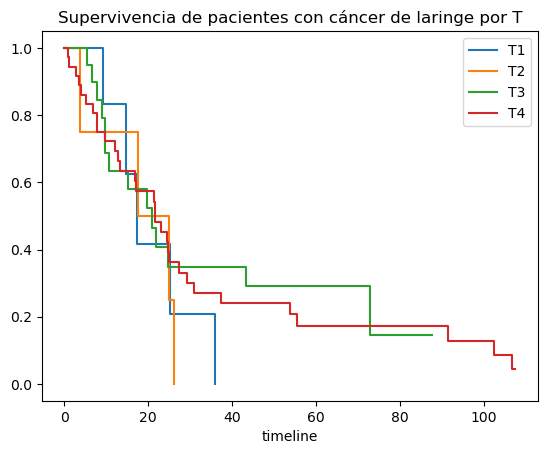

In [644]:
t1= df10['T']=='T1'
t2= df10['T']=='T2'
t3= df10['T']=='T3'
t4= df10['T']=='T4'
ax=plt.subplot(111)

t1_kmf=kmf.fit(durations=df10[t1]['Supervivencia desde el dx (meses)'], event_observed=df10[t1]['Estado actual'], label='T1')
t1_kmf.plot_survival_function(ax=ax, ci_show=False)
print(t1_kmf.median_survival_time_)
print(t1_kmf.predict([12, 36, 60]))
t2_kmf=kmf.fit(durations=df10[t2]['Supervivencia desde el dx (meses)'], event_observed=df10[t2]['Estado actual'], label='T2')
t2_kmf.plot_survival_function(ax=ax, ci_show=False)
print(t2_kmf.median_survival_time_)
print(t2_kmf.predict([12, 36, 60]))
t3_kmf=kmf.fit(durations=df10[t3]['Supervivencia desde el dx (meses)'], event_observed=df10[t3]['Estado actual'], label='T3')
t3_kmf.plot_survival_function(ax=ax, ci_show=False)
print(t3_kmf.median_survival_time_)
print(t3_kmf.predict([12, 36, 60]))
t4_kmf=kmf.fit(durations=df10[t4]['Supervivencia desde el dx (meses)'], event_observed=df10[t4]['Estado actual'], label='T4')
t4_kmf.plot_survival_function(ax=ax, ci_show=False)
print(t4_kmf.predict([12, 36, 60]))
print(t4_kmf.median_survival_time_)
plt.title('Supervivencia de pacientes con cáncer de laringe por T')
plt.show()

In [458]:
t_sup= np.array(df10['Supervivencia desde el dx (meses)'])
t_loc=np.array(df10['T'])
t_event=np.array(df10['Estado actual'])
multivariate_logrank_test(t_sup, t_loc, t_event, alpha=0.95)

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           0.90 0.83      0.28

In [459]:
pairwise_logrank_test(t_sup, t_loc, t_event,   alpha=0.95, t_0=-1, bonferroni=True)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
        bonferroni = True
         test_name = logrank_test

---
       test_statistic    p  -log2(p)
T1 T2            0.10 0.75      0.42
   T3            0.34 0.56      0.83
   T4            0.16 0.69      0.54
T2 T3            0.58 0.45      1.16
   T4            0.55 0.46      1.13
T3 T4            0.06 0.81      0.31

In [460]:
df11=pd.DataFrame(df[['N', 'Supervivencia desde el dx (meses)', 'Estado actual']].dropna())
print(df11)

     N  Supervivencia desde el dx (meses)  Estado actual
0   N0                           3.766667            1.0
1   N0                          25.300000            1.0
2   N1                           9.666667            1.0
4   N0                           9.266667            1.0
5   N1                          25.000000            1.0
..  ..                                ...            ...
67  N0                          10.900000            0.0
68  N1                          12.200000            0.0
69  N2                           5.866667            0.0
70  N1                           6.533333            1.0
71  N0                           8.633333            0.0

[66 rows x 3 columns]


In [590]:
df12=pd.DataFrame(df[['M', 'Supervivencia desde el dx (meses)', 'Estado actual']].dropna())
print(df12)

     M  Supervivencia desde el dx (meses)  Estado actual
0   M0                           3.766667            1.0
1   M0                          25.300000            1.0
2   M0                           9.666667            1.0
4   M1                           9.266667            1.0
5   M0                          25.000000            1.0
..  ..                                ...            ...
67  M0                          10.900000            0.0
68  M0                          12.200000            0.0
69  Mx                           5.866667            0.0
70  M0                           6.533333            1.0
71  M1                           8.633333            0.0

[67 rows x 3 columns]


12    0.7280
36    0.2744
60    0.2352
Name: N0, dtype: float64
12    0.700000
36    0.116667
60    0.116667
Name: N1, dtype: float64
12    0.635556
36    0.346667
60    0.144444
Name: N2, dtype: float64
12    0.8
36    0.2
60    0.2
Name: N3, dtype: float64


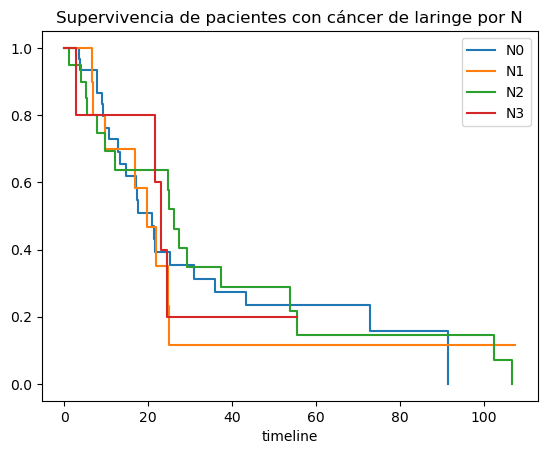

In [462]:
n0= df11['N']=='N0'
n1= df11['N']=='N1'
n2= df11['N']=='N2'
n3= df11['N']=='N3'
ax=plt.subplot(111)

n0_kmf=kmf.fit(durations=df11[n0]['Supervivencia desde el dx (meses)'], event_observed=df11[n0]['Estado actual'], label='N0')
n0_kmf.plot_survival_function(ax=ax, ci_show=False)
print(n0_kmf.predict([12, 36, 60]))
n1_kmf=kmf.fit(durations=df11[n1]['Supervivencia desde el dx (meses)'], event_observed=df11[n1]['Estado actual'], label='N1')
n1_kmf.plot_survival_function(ax=ax, ci_show=False)
print(n1_kmf.predict([12, 36, 60]))
n2_kmf=kmf.fit(durations=df11[n2]['Supervivencia desde el dx (meses)'], event_observed=df11[n2]['Estado actual'], label='N2')
n2_kmf.plot_survival_function(ax=ax, ci_show=False)
print(n2_kmf.predict([12, 36, 60]))
n3_kmf=kmf.fit(durations=df11[n3]['Supervivencia desde el dx (meses)'], event_observed=df11[n3]['Estado actual'], label='N3')
n3_kmf.plot_survival_function(ax=ax, ci_show=False)
print(n3_kmf.predict([12, 36, 60]))

plt.title('Supervivencia de pacientes con cáncer de laringe por N')
plt.show()

In [463]:
n_sup= np.array(df11['Supervivencia desde el dx (meses)'])
n_loc=np.array(df11['N'])
n_event=np.array(df11['Estado actual'])
multivariate_logrank_test(t_sup, t_loc, t_event, alpha=0.95)

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           0.90 0.83      0.28

In [464]:
pairwise_logrank_test(n_sup, n_loc, n_event,   alpha=0.95, t_0=-1, bonferroni=True)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
        bonferroni = True
         test_name = logrank_test

---
         test_statistic    p  -log2(p)
N0  N0             0.51 0.48      1.07
    N1             0.09 0.77      0.38
    N2             0.10 0.76      0.40
    N3             0.01 0.94      0.09
N0  N1             0.78 0.38      1.41
    N2             0.55 0.46      1.13
    N3             1.34 0.25      2.02
N1  N2             0.20 0.66      0.60
    N3             0.10 0.76      0.41
N2  N3             0.14 0.70      0.50

21.4
12    0.700855
36    0.235422
60    0.160515
Name: M0, dtype: float64
26.1
12    0.634921
36    0.380952
60    0.253968
Name: M1, dtype: float64


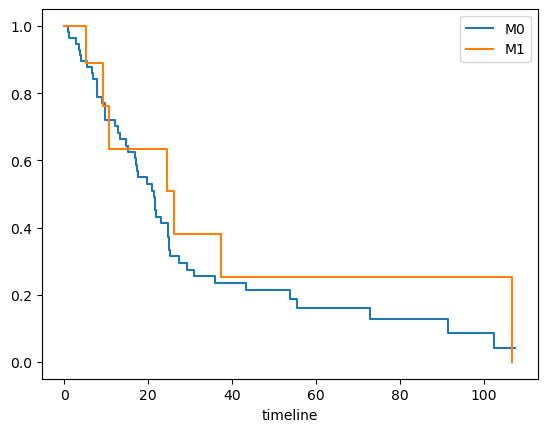

In [465]:
m0= df12['M']=='M0'
m1= df12['M']=='M1'
ax=plt.subplot(111)
m0_kmf=kmf.fit(durations=df12[m0]['Supervivencia desde el dx (meses)'], event_observed=df12[m0]['Estado actual'], label='M0')
m0_kmf.plot_survival_function(ax=ax, ci_show=False)
print(m0_kmf.median_survival_time_)
print(m0_kmf.predict([12, 36, 60]))
m1_kmf=kmf.fit(durations=df12[m1]['Supervivencia desde el dx (meses)'], event_observed=df12[m1]['Estado actual'], label='M1')
m1_kmf.plot_survival_function(ax=ax, ci_show=False)
print(m1_kmf.median_survival_time_)
print(m1_kmf.predict([12, 36, 60]))

In [466]:
sup_m0= df12[df12['M']=='M0']['Supervivencia desde el dx (meses)']
sup_m1=df12[df12['M']=='M1']['Supervivencia desde el dx (meses)']
event_m0=df12[df12['M']=='M0']['Estado actual']
event_m1=df12[df12['M']=='M1']['Estado actual']
resultados=logrank_test(sup_m0, sup_m1, event_m0, event_m1, alpha=0.95)
resultados.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.51 0.48      1.07

In [591]:
expected, observed, stats= pingouin.chi2_independence(data=df12, x='M', y='Estado actual', correction=True)
print(stats)
print(expected)
print(observed)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  4.325569  2.0  0.115004  0.254088  0.444909
1        cressie-read  0.666667  3.742894  2.0  0.153901  0.236356  0.391708
2      log-likelihood  0.000000  3.452871  2.0  0.177917  0.227014  0.364558
3       freeman-tukey -0.500000       NaN  2.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000       inf  2.0  0.000000       inf  1.000000
5              neyman -2.000000       NaN  2.0       NaN       NaN       NaN
Estado actual        0.0        1.0
M                                  
M0             11.059701  45.940299
M1              1.746269   7.253731
Mx              0.194030   0.805970
Estado actual  0.0  1.0
M                      
M0              10   47
M1               2    7
Mx               1    0


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [468]:
T_exp, E_exp = sup_m0, event_m0
T_con, E_con = sup_m1, event_m1

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 12
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 12
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 57 total observations, 10 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 9 total observations, 2 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.14 0.71      0.50

In [469]:
T_exp, E_exp = sup_m0, event_m0
T_con, E_con = sup_m1, event_m1

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 36
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 36
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 57 total observations, 10 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 9 total observations, 2 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.40 0.53      0.93

In [470]:
T_exp, E_exp = sup_m0, event_m0
T_con, E_con = sup_m1, event_m1

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 60
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 60
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 57 total observations, 10 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 9 total observations, 2 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.36 0.55      0.87

In [645]:
df14=pd.DataFrame(df[['Estadio clínico', 'Supervivencia desde el dx (meses)', 'Estado actual']].dropna())
df14=df14.replace(['I','II'], 'a')
df14=df14.replace(['III','IV'], 'b')
print(df14)

   Estadio clínico  Supervivencia desde el dx (meses)  Estado actual
0                a                           3.766667            1.0
1                a                          25.300000            1.0
2                b                           9.666667            1.0
4                b                           9.266667            1.0
5                b                          25.000000            1.0
..             ...                                ...            ...
67               a                          10.900000            0.0
68               b                          12.200000            0.0
69               b                           5.866667            0.0
70               b                           6.533333            1.0
71               b                           8.633333            0.0

[68 rows x 3 columns]


In [472]:
estadio1y2= df14['Estadio clínico']=='a'  
estadio3y4=df14['Estadio clínico']=='b'  
t=np.linspace(0,36,37)

17.6
12    0.875000
36    0.145833
60    0.000000
Name: Estadios I-II, dtype: float64
21.66666667
12    0.676034
36    0.282909
60    0.194990
Name: Estadios III-IV, dtype: float64


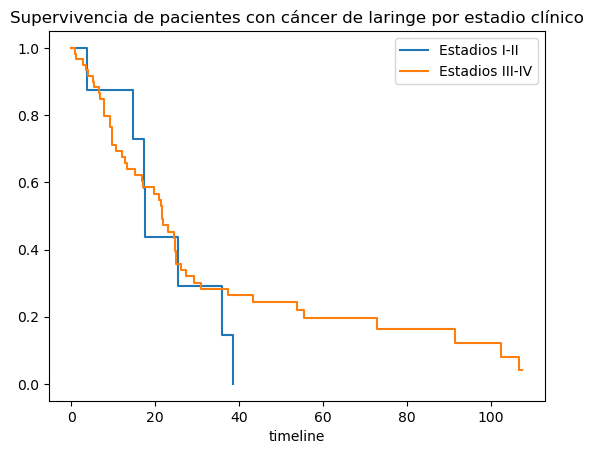

In [647]:
ax=plt.subplot(111)
e1y2_kmf=kmf.fit(durations=df14[estadio1y2]['Supervivencia desde el dx (meses)'], event_observed=df14[estadio1y2]['Estado actual'], label='Estadios I-II')
e1y2_kmf.plot_survival_function(ax=ax,ci_show=False)
print(e1y2_kmf.median_survival_time_)
print(e1y2_kmf.predict([12, 36, 60]))
e3y4_kmf=kmf.fit(durations=df14[estadio3y4]['Supervivencia desde el dx (meses)'], event_observed=df14[estadio3y4]['Estado actual'], label='Estadios III-IV')
e3y4_kmf.plot_survival_function(ax=ax, ci_show=False)
print(e3y4_kmf.median_survival_time_)
print(e3y4_kmf.predict([12, 36, 60]))
plt.title('Supervivencia de pacientes con cáncer de laringe por estadio clínico')
plt.show()

In [475]:
sup_e1y2= df14[df14['Estadio clínico']=='a']['Supervivencia desde el dx (meses)']
sup_e3y4=df14[df14['Estadio clínico']=='b']['Supervivencia desde el dx (meses)']
event_e1y2=df14[df14['Estadio clínico']=='a']['Estado actual']
event_e3y4=df14[df14['Estadio clínico']=='b']['Estado actual']
resultados6=logrank_test(sup_e1y2, sup_e3y4, event_e1y2, event_e3y4, alpha=0.95)
resultados6.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.36 0.55      0.87

In [476]:
T_exp, E_exp = sup_e1y2, event_e1y2
T_con, E_con = sup_e3y4, event_e3y4

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 12
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()


<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 12
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 8 total observations, 1 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 60 total observations, 12 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.72 0.40      1.34

In [477]:
T_exp, E_exp = sup_e1y2, event_e1y2
T_con, E_con = sup_e3y4, event_e3y4

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 36
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()


<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 36
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 8 total observations, 1 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 60 total observations, 12 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           0.68 0.41      1.29

In [478]:
T_exp, E_exp = sup_e1y2, event_e1y2
T_con, E_con = sup_e3y4, event_e3y4

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp)
kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con)

point_in_time = 60
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()


<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 60
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 8 total observations, 1 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 60 total observations, 12 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic      p  -log2(p)
            inf <0.005       inf

In [479]:
print(e1y2_kmf.median_survival_time_)

21.66666667


In [480]:
pip install pingouin --upgrade

Note: you may need to restart the kernel to use updated packages.


In [481]:
import pingouin

In [592]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='Consumo de tabaco', y='Tipo histológico', correction=True)
print(stats)

                 test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  10.389205  2.0  0.005546  0.372186  0.830743
1        cressie-read  0.666667   9.364233  2.0  0.009259  0.353350  0.787908
2      log-likelihood  0.000000   9.238116  2.0  0.009862  0.350963  0.782067
3       freeman-tukey -0.500000        NaN  2.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000        inf  2.0  0.000000       inf  1.000000
5              neyman -2.000000        NaN  2.0       NaN       NaN       NaN


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [593]:
print(expected)

Tipo histológico    Escamoso   Linfoma   Sarcoma
Consumo de tabaco                               
No                 15.304348  0.463768  0.231884
Sí                 50.695652  1.536232  0.768116


In [484]:
print(observed)

Tipo histológico   Escamoso  Linfoma  Sarcoma
Consumo de tabaco                            
No                       13        2        1
Sí                       53        0        0


In [662]:
expected, observed, stats= pingouin.chi2_independence(data=df, x='Consumo de alcohol', y='Tipo histológico', correction=True)
print(stats)
print(observed)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  6.272727  2.0  0.043440  0.289200  0.604428
1        cressie-read  0.666667  6.106622  2.0  0.047202  0.285345  0.592091
2      log-likelihood  0.000000  6.868829  2.0  0.032244  0.302629  0.646602
3       freeman-tukey -0.500000       NaN  2.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000       inf  2.0  0.000000       inf  1.000000
5              neyman -2.000000       NaN  2.0       NaN       NaN       NaN
Tipo histológico    Escamoso  Linfoma  Sarcoma
Consumo de alcohol                            
No                        20        2        1
Sí                        46        0        0


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [603]:
df22=pd.DataFrame(df[['Consumo de tabaco', 'Tipo histológico']].dropna())
print(df22.isnull)

<bound method DataFrame.isnull of    Consumo de tabaco Tipo histológico
0                 Sí         Escamoso
1                 Sí         Escamoso
2                 Sí         Escamoso
3                 No          Linfoma
4                 Sí         Escamoso
..               ...              ...
67                Sí         Escamoso
68                No         Escamoso
69                Sí         Escamoso
70                Sí         Escamoso
71                No         Escamoso

[69 rows x 2 columns]>


In [639]:
kruskal(data=df22, dv='Consumo de tabaco', between='Tipo histológico')

ValueError: DV must be numeric.

In [609]:
pingouin.anova(data=df, dv='Supervivencia desde el dx (meses)', between='Sexo')

,Source,ddof1,ddof2,F,p-unc,np2
0,Sexo,1,67,0.187087,0.666741,0.002785


In [610]:
columnas=[df['Edad'], df['Sexo'], df['Procedencia']
, df['Ocupación'], df['Quimioterapia'], df['Radioterapia']]

In [611]:
pingouin.anova(data=df, dv='Supervivencia desde el dx (meses)', between='Quimioterapia')

,Source,ddof1,ddof2,F,p-unc,np2
0,Quimioterapia,1,65,0.028954,0.865415,0.000445


In [612]:
df.pairwise_tukey(dv='Supervivencia desde el dx (meses)', between='Quimioterapia', effsize='odds-ratio')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,odds-ratio
0,No,Sí,26.132292,27.230476,-1.098185,6.453936,-0.170157,0.865415,0.927292


In [613]:
pingouin.anova(data=df, dv='Supervivencia desde el dx (meses)', between='Radioterapia')

,Source,ddof1,ddof2,F,p-unc,np2
0,Radioterapia,1,65,0.198883,0.657106,0.00305


In [614]:
df80= df[['Supervivencia desde el dx (meses)', 'Edad']].dropna()
print(df80)

    Supervivencia desde el dx (meses)  Edad
0                            3.766667  72.0
1                           25.300000  70.0
2                            9.666667  60.0
4                            9.266667  60.0
5                           25.000000  53.0
..                                ...   ...
67                          10.900000  36.0
68                          12.200000  59.0
69                           5.866667  59.0
70                           6.533333  67.0
71                           8.633333  72.0

[69 rows x 2 columns]


In [615]:
x= df80['Supervivencia desde el dx (meses)']
y= df80['Edad']
pingouin.ttest(x, y, correction='auto')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-10.316738,136,two-sided,8.656624e-19,"[-42.63, -28.92]",1.756438,4.326e+15,1.0


In [616]:
qt= df['Quimioterapia'].groupby(df['Estadio clínico'])

In [617]:
from lifelines.utils import find_best_parametric_model

In [618]:
t= sup['Supervivencia desde el dx (meses)']
e= sup['Estado actual']
best_model, best_aic=find_best_parametric_model(event_times=t, event_observed=e, scoring_method='AIC')

In [ ]:
print(best_model)

In [ ]:
print(best_aic)

In [ ]:
from lifelines.plotting import qq_plot
from lifelines import WeibullFitter, LogNormalFitter, LogLogisticFitter, WeibullAFTFitter

In [ ]:
for model in [WeibullFitter(), LogNormalFitter(), LogLogisticFitter()]:
    model.fit(t, e)
    qq_plot(model)
    plt.show()

In [619]:
df['Supraglótico']= df['Localización del tumor']=='Supraglótico'
df['N0']= df['N']== 'N0'

In [621]:
expected1, observed1, stats1= pingouin.chi2_independence(data=df, x='Supraglótico', y='N0', correction=True)
print(stats1)
print(expected1)
print(observed1)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  1.229787  1.0  0.267448  0.128051  0.198457
1        cressie-read  0.666667  1.240448  1.0  0.265385  0.128605  0.199775
2      log-likelihood  0.000000  1.266469  1.0  0.260430  0.129947  0.202991
3       freeman-tukey -0.500000  1.290403  1.0  0.255974  0.131169  0.205949
4  mod-log-likelihood -1.000000  1.318458  1.0  0.250869  0.132587  0.209416
5              neyman -2.000000  1.388381  1.0  0.238679  0.136058  0.218055
N0            False  True
Supraglótico             
False          34.4  25.6
True            8.6   6.4
N0            False  True
Supraglótico             
False          32.5  27.5
True           10.5   4.5


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [623]:
expected2, observed2, stats2= pingouin.chi2_independence(data= df, x='M', y='Estado actual', correction=True)
print(stats2)
print(expected2)
print(observed2)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  4.513038  2.0  0.104714  0.245304  0.461572
1        cressie-read  0.666667  3.882606  2.0  0.143517  0.227526  0.404641
2      log-likelihood  0.000000  3.544586  2.0  0.169943  0.217396  0.373184
3       freeman-tukey -0.500000       NaN  2.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000       inf  2.0  0.000000       inf  1.000000
5              neyman -2.000000       NaN  2.0       NaN       NaN       NaN
Estado actual        0.0        1.0
M                                  
M0             11.115942  47.884058
M1              1.695652   7.304348
Mx              0.188406   0.811594
Estado actual  0.0  1.0
M                      
M0              10   49
M1               2    7
Mx               1    0


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [624]:
df23=df['M'].dropna(), df['Estado actual'].dropna()
pingouin.ttest(x=df23['M'], y=df22['Estado actual'], paired=True, correction='auto')

TypeError: tuple indices must be integers or slices, not str

In [625]:
from pingouin import kruskal




In [626]:
kruskal(data=df, dv='Supervivencia desde el dx (meses)', between='Estadio clínico')

,Source,ddof1,H,p-unc
Kruskal,Estadio clínico,3,3.179866,0.364716


In [627]:
kruskal(data=df, dv='Supervivencia desde el dx (meses)', between='T')

,Source,ddof1,H,p-unc
Kruskal,T,3,0.265432,0.966393


In [628]:
kruskal(data=df, dv='Supervivencia desde el dx (meses)', between='N')

,Source,ddof1,H,p-unc
Kruskal,N,4,0.260888,0.992197


In [629]:
kruskal(data=df, dv='Supervivencia desde el dx (meses)', between='M')

,Source,ddof1,H,p-unc
Kruskal,M,2,1.814868,0.403558


In [630]:
pingouin.anova(dv='Supervivencia desde el dx (meses)', between='Localización del tumor', data=df, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Localización del tumor,3915.274002,3,1305.091334,1.972388,0.127347,0.087123
1,Within,41024.205480,62,661.680734,NaN,NaN,NaN


In [631]:
df.pairwise_tukey(dv='Supervivencia desde el dx (meses)', between='Localización del tumor', effsize='odds-ratio')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,odds-ratio
0,Glótico,Subglótico,16.022222,49.111111,-33.088889,16.268752,-2.033892,0.186829,0.015669
1,Glótico,Supraglótico,16.022222,24.369048,-8.346825,9.559025,-0.873188,0.818664,0.447654
2,Glótico,Transglótico,16.022222,31.000000,-14.977778,7.973283,-1.878496,0.247793,0.367562
3,Subglótico,Supraglótico,49.111111,24.369048,24.742063,16.365303,1.511861,0.436691,8.786010
4,Subglótico,Transglótico,49.111111,31.000000,18.111111,15.492625,1.169015,0.648466,2.992071
5,Supraglótico,Transglótico,24.369048,31.000000,-6.630952,8.168483,-0.811773,0.848673,0.656923


In [632]:
pingouin.pairwise_tests(dv='Supervivencia desde el dx (meses)', between='Localización del tumor', data=df)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Localización del tumor,Glótico,Subglótico,False,True,-6.218900,8.098462,two-sided,0.000242,895.591,-2.182245
1,Localización del tumor,Glótico,Supraglótico,False,True,-1.177499,22.960022,two-sided,0.251059,0.586,-0.430699
2,Localización del tumor,Glótico,Transglótico,False,True,-2.271449,46.226848,two-sided,0.027820,2.269,-0.542953
3,Localización del tumor,Subglótico,Supraglótico,False,True,3.589498,12.935761,two-sided,0.003322,11.947,1.137205
4,Localización del tumor,Subglótico,Transglótico,False,True,2.837363,15.744681,two-sided,0.012031,5.513,0.591196
5,Localización del tumor,Supraglótico,Transglótico,False,True,-0.837536,33.742637,two-sided,0.408184,0.409,-0.227865


In [633]:
pingouin.anova(dv='Estado actual', between='Localización del tumor', data=df, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Localización del tumor,0.941201,3,0.313734,2.122133,0.105932,0.089207
1,Within,9.609524,65,0.147839,NaN,NaN,NaN


In [634]:
pingouin.anova(dv='Supervivencia desde el dx (meses)', between='Estadio clínico', data=df, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Estadio clínico,1096.012064,3,365.337355,0.527779,0.664802,0.024142
1,Within,44301.839901,64,692.216248,NaN,NaN,NaN


In [635]:
pingouin.anova(dv='Supervivencia desde el dx (meses)', between='T', data=df, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,T,1105.274708,3,368.424903,0.525667,0.666247,0.02442
1,Within,44154.875413,63,700.871038,NaN,NaN,NaN


In [636]:
pingouin.anova(dv='Supervivencia desde el dx (meses)', between='N', data=df, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,N,322.733009,4,80.683252,0.111205,0.978146,0.007239
1,Within,44257.593948,61,725.534327,NaN,NaN,NaN


In [637]:
expected3, observed3, stats3= pingouin.chi2_independence(data= df, x='Resección quirúrgica', y='Estado actual', correction=False)
print(stats3)
print(expected3)
print(observed3)


                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.300638  1.0  0.583483  0.063313  0.085091
1        cressie-read  0.666667  0.299295  1.0  0.584325  0.063171  0.084932
2      log-likelihood  0.000000  0.296895  1.0  0.585836  0.062917  0.084647
3       freeman-tukey -0.500000  0.295338  1.0  0.586820  0.062752  0.084463
4  mod-log-likelihood -1.000000  0.293984  1.0  0.587679  0.062608  0.084302
5              neyman -2.000000  0.291870  1.0  0.589025  0.062383  0.084051
Estado actual              0.0        1.0
Resección quirúrgica                     
No                    5.126761  22.873239
Sí                    7.873239  35.126761
Estado actual         0.0  1.0
Resección quirúrgica          
No                      6   22
Sí                      7   36


Text(0, 0.5, 'Cumm')

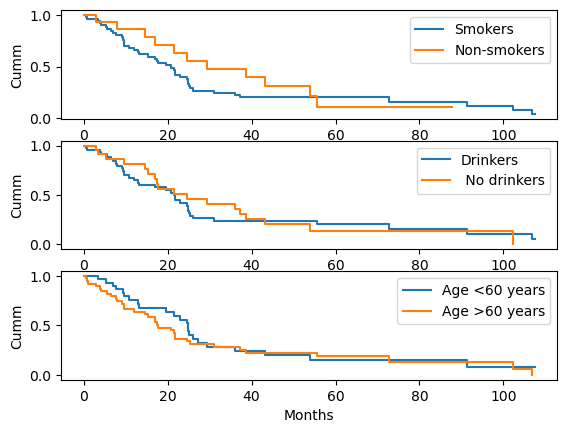

In [640]:
fig, axs = plt.subplots(3) 
fum_kmf=kmf.fit(durations=df2[tabaquismo]['Supervivencia desde el dx (meses)'], event_observed=df2[tabaquismo]['Estado actual'], label='Smokers')
fum_kmf.plot_survival_function(ax=axs[0], ci_show=False)
nofum_kmf=kmf.fit(durations=df2[~tabaquismo]['Supervivencia desde el dx (meses)'], event_observed=df2[~tabaquismo]['Estado actual'], label='Non-smokers')
nofum_kmf.plot_survival_function(ax=axs[0], ci_show=False)
#alcohol
alc_kmf=kmf.fit(durations=df3[alcoholismo]['Supervivencia desde el dx (meses)'], event_observed=df3[alcoholismo]['Estado actual'], label='Drinkers')
alc_kmf.plot_survival_function(ax=axs[1], ci_show=False)
noalc_kmf=kmf.fit(durations=df3[~alcoholismo]['Supervivencia desde el dx (meses)'], event_observed=df3[~alcoholismo]['Estado actual'], label=' No drinkers')
noalc_kmf.plot_survival_function(ax=axs[1], ci_show=False)
#edad
menores_kmf=kmf.fit(durations=df4[menos_60]['Supervivencia desde el dx (meses)'], event_observed=df4[menos_60]['Estado actual'], label='Age <60 years')
menores_kmf.plot_survival_function(ax=axs[2], ci_show=False)
mayores_kmf=kmf.fit(durations=df4[~menos_60]['Supervivencia desde el dx (meses)'], event_observed=df4[~menos_60]['Estado actual'], label='Age >60 years')
mayores_kmf.plot_survival_function(ax=axs[2], ci_show=False)
axs[2].set_xlabel('Months')
axs[2].set_ylabel('Cumm')
axs[0].set_ylabel('Cumm')
axs[1].set_ylabel('Cumm')

Text(0.5, 0, '')

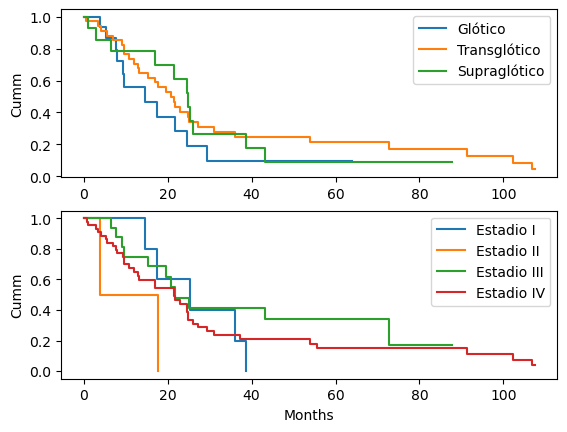

In [641]:
fig, axs = plt.subplots(2) 
glotico_kmf=kmf.fit(durations=df5[glotico]['Supervivencia desde el dx (meses)'], event_observed=df5[glotico]['Estado actual'], label='Glótico')
glotico_kmf.plot_survival_function(ax=axs[0], ci_show=False)
transglotico_kmf=kmf.fit(durations=df5[transglotico]['Supervivencia desde el dx (meses)'], event_observed=df5[transglotico]['Estado actual'], label='Transglótico')
transglotico_kmf.plot_survival_function(ax=axs[0], ci_show=False)
supraglotico_kmf=kmf.fit(durations=df5[supraglotico]['Supervivencia desde el dx (meses)'], event_observed=df5[supraglotico]['Estado actual'], label='Supraglótico')
supraglotico_kmf.plot_survival_function(ax=axs[0], ci_show=False)

estadio1_kmf=kmf.fit(durations=df9[estadio1]['Supervivencia desde el dx (meses)'], event_observed=df9[estadio1]['Estado actual'], label='Estadio I')
estadio1_kmf.plot_survival_function(ax=axs[1], ci_show=False)
estadio2_kmf=kmf.fit(durations=df9[estadio2]['Supervivencia desde el dx (meses)'], event_observed=df9[estadio2]['Estado actual'], label='Estadio II')
estadio2_kmf.plot_survival_function(ax=axs[1], ci_show=False)
estadio3_kmf=kmf.fit(durations=df9[estadio3]['Supervivencia desde el dx (meses)'], event_observed=df9[estadio3]['Estado actual'], label='Estadio III')
estadio3_kmf.plot_survival_function(ax=axs[1], ci_show=False)
estadio4_kmf=kmf.fit(durations=df9[estadio4]['Supervivencia desde el dx (meses)'], event_observed=df9[estadio4]['Estado actual'], label='Estadio IV')
estadio4_kmf.plot_survival_function(ax=axs[1], ci_show=False)
axs[1].set_xlabel('Months')
axs[1].set_ylabel('Cumm')
axs[0].set_ylabel('Cumm')
axs[0].set_xlabel('')

In [491]:
pd.value_counts(df['Recurrencia locorregional'])

0.0    52
1.0    20
Name: Recurrencia locorregional, dtype: int64

In [661]:
expected4, observed4, stats4= pingouin.chi2_independence(data= df, x='ERGE', y='Tipo histológico', correction=True)
print(stats4)
print(expected4)
print(observed4)


                 test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  10.843100  2.0  0.004420  0.380230  0.847237
1        cressie-read  0.666667   7.340977  2.0  0.025464  0.312857  0.677660
2      log-likelihood  0.000000   4.063663  2.0  0.131095  0.232771  0.421243
3       freeman-tukey -0.500000        NaN  2.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000        inf  2.0  0.000000       inf  1.000000
5              neyman -2.000000        NaN  2.0       NaN       NaN       NaN
Tipo histológico  Escamoso   Linfoma   Sarcoma
ERGE                                          
No                  66.125  1.916667  0.958333
Sí                   2.875  0.083333  0.041667
Tipo histológico  Escamoso  Linfoma  Sarcoma
ERGE                                        
No                      67        1        1
Sí                       2        1        0


C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\HUAWEI\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [654]:
from scipy.stats import fisher_exact

In [657]:
tabla=[[46,0], [20,3]]


In [658]:
odd_ratio, p_value = stats.fisher_exact(tabla, alternative='two-sided')
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

AttributeError: 'DataFrame' object has no attribute 'fisher_exact'